### 1) Problem Statement
* You are opening a new Store at a particular location. Now, Given the Store Location, Area, Size and other params. Predict the overall revenue/Sale generation of the Store.

### 2) Hypothesis Generation
* Item_Identifier- Unique product ID

* Item_Weight- Weight of product

* Item_Fat_Content - Whether the product is low fat or not

* Item_Visibility - The % of total display area of all products in a store allocated to the particular product

* Item_Type - The category to which the product belongs

* Item_MRP - Maximum Retail Price (list price) of the product

* Outlet_Identifier - Unique store ID

* Outlet_Establishment_Year- The year in which store was established

* Outlet_Size - The size of the store in terms of ground area covered

* Outlet_Location_Type- The type of city in which the store is located

* Outlet_Type- Whether the outlet is just a grocery store or some sort of supermarket

* Item_Outlet_Sales - Sales of the product in the particulat store. This is the outcome variable to be predicted.

### 3) Loading Packages and Data

In [586]:
import pandas as pd 
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as  plt 
from datetime import datetime
import numpy as np 
import seaborn as sns 
sns.set_theme(context = 'notebook' ,
              palette = 'seismic' , font_scale = 0.8 , style = 'darkgrid' , rc = {'figure.figsize':[20 , 7]})
import plotly_express as px
import warnings
warnings.filterwarnings('ignore', category=Warning)
import plotly.express as px
import statsmodels.api as sm

### 4) Data Structure and Content

In [587]:
df = pd.read_csv('Train.csv')
df1 = pd.read_csv('Test.csv')

In [588]:
df1

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDW58       20.750          Low Fat         0.007565   
1              FDW14        8.300              reg         0.038428   
2              NCN55       14.600          Low Fat         0.099575   
3              FDQ58        7.315          Low Fat         0.015388   
4              FDY38          NaN          Regular         0.118599   
...              ...          ...              ...              ...   
5676           FDB58       10.500          Regular         0.013496   
5677           FDD47        7.600          Regular         0.142991   
5678           NCO17       10.000          Low Fat         0.073529   
5679           FDJ26       15.300          Regular         0.000000   
5680           FDU37        9.500          Regular         0.104720   

               Item_Type  Item_MRP Outlet_Identifier  \
0            Snack Foods  107.8622            OUT049   
1                  Dairy   87.3198            OUT017   
2                 Others  241.7538            OUT010   
3            Snack Foods  155.0340            OUT017   
4                  Dairy  234.2300            OUT027   
...                  ...       ...               ...   
5676         Snack Foods  141.3154            OUT046   
5677       Starchy Foods  169.1448            OUT018   
5678  Health and Hygiene  118.7440            OUT045   
5679              Canned  214.6218            OUT017   
5680              Canned   79.7960            OUT045   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2007         NaN               Tier 2   
2                          1998         NaN               Tier 3   
3                          2007         NaN               Tier 2   
4                          1985      Medium               Tier 3   
...                         ...         ...                  ...   
5676                       1997       Small               Tier 1   
5677                       2009      Medium               Tier 3   
5678                       2002         NaN               Tier 2   
5679                       2007         NaN               Tier 2   
5680                       2002         NaN               Tier 2   

            Outlet_Type  
0     Supermarket Type1  
1     Supermarket Type1  
2         Grocery Store  
3     Supermarket Type1  
4     Supermarket Type3  
...                 ...  
5676  Supermarket Type1  
5677  Supermarket Type2  
5678  Supermarket Type1  
5679  Supermarket Type1  
5680  Supermarket Type1  

[5681 rows x 11 columns]

In [589]:
df

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks   48.2692            OUT018   
2                      Meat  141.6180            OUT049   
3     Fruits and Vegetables  182.0950            OUT010   
4                 Household   53.8614            OUT013   
...                     ...       ...               ...   
8518            Snack Foods  214.5218            OUT013   
8519           Baking Goods  108.1570            OUT045   
8520     Health and Hygiene   85.1224            OUT035   
8521            Snack Foods  103.1332            OUT018   
8522            Soft Drinks   75.4670            OUT046   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2009      Medium               Tier 3   
2                          1999      Medium               Tier 1   
3                          1998         NaN               Tier 3   
4                          1987        High               Tier 3   
...                         ...         ...                  ...   
8518                       1987        High               Tier 3   
8519                       2002         NaN               Tier 2   
8520                       2004       Small               Tier 2   
8521                       2009      Medium               Tier 3   
8522                       1997       Small               Tier 1   

            Outlet_Type  Item_Outlet_Sales  
0     Supermarket Type1          3735.1380  
1     Supermarket Type2           443.4228  
2     Supermarket Type1          2097.2700  
3         Grocery Store           732.3800  
4     Supermarket Type1           994.7052  
...                 ...                ...  
8518  Supermarket Type1          2778.3834  
8519  Supermarket Type1           549.2850  
8520  Supermarket Type1          1193.1136  
8521  Supermarket Type2          1845.5976  
8522  Supermarket Type1           765.6700  

[8523 rows x 12 columns]

###  sorting the data 

In [590]:
df = df.sort_values(['Outlet_Establishment_Year','Item_Outlet_Sales'] ,  ascending=True , ignore_index=True)

In [591]:
df

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDU21          NaN          Regular         0.134328   
1              NCL41          NaN          Low Fat         0.073077   
2              FDS40          NaN          Low Fat         0.024546   
3              FDQ36          NaN          Regular         0.000000   
4              FDH28          NaN              reg         0.192650   
...              ...          ...              ...              ...   
8518           FDR25        17.00          Regular         0.140090   
8519           NCX30        16.70          Low Fat         0.026729   
8520           FDY51        12.50          Low Fat         0.081465   
8521           FDU51        20.20          Regular         0.096907   
8522           FDC02        21.35          Low Fat         0.069103   

               Item_Type  Item_MRP Outlet_Identifier  \
0            Snack Foods   35.0558            OUT019   
1     Health and Hygiene   34.3216            OUT019   
2           Frozen Foods   34.6190            OUT019   
3           Baking Goods   38.1848            OUT019   
4           Frozen Foods   37.4506            OUT019   
...                  ...       ...               ...   
8518              Canned  265.1884            OUT018   
8519           Household  248.4776            OUT018   
8520                Meat  220.7798            OUT018   
8521                Meat  175.5028            OUT018   
8522              Canned  259.9278            OUT018   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1985       Small               Tier 1   
1                          1985       Small               Tier 1   
2                          1985       Small               Tier 1   
3                          1985       Small               Tier 1   
4                          1985       Small               Tier 1   
...                         ...         ...                  ...   
8518                       2009      Medium               Tier 3   
8519                       2009      Medium               Tier 3   
8520                       2009      Medium               Tier 3   
8521                       2009      Medium               Tier 3   
8522                       2009      Medium               Tier 3   

            Outlet_Type  Item_Outlet_Sales  
0         Grocery Store            33.9558  
1         Grocery Store            34.6216  
2         Grocery Store            36.6190  
3         Grocery Store            37.2848  
4         Grocery Store            37.9506  
...                 ...                ...  
8518  Supermarket Type2          6359.7216  
8519  Supermarket Type2          6439.6176  
8520  Supermarket Type2          6611.3940  
8521  Supermarket Type2          6729.9064  
8522  Supermarket Type2          6768.5228  

[8523 rows x 12 columns]

### check information of the data 

In [592]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


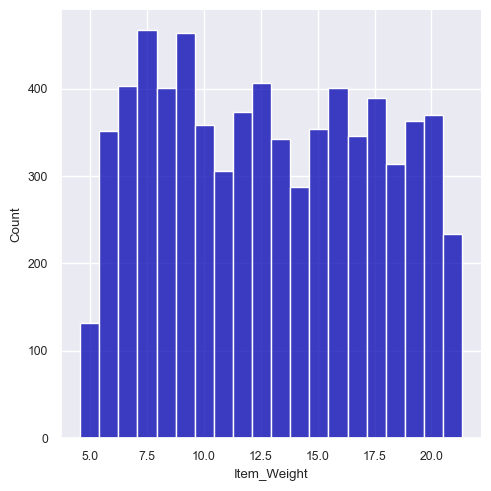

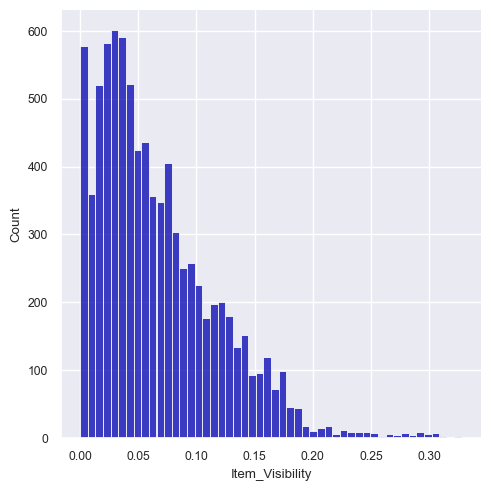

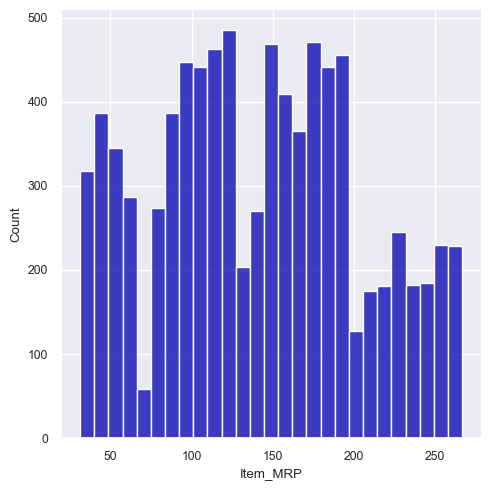

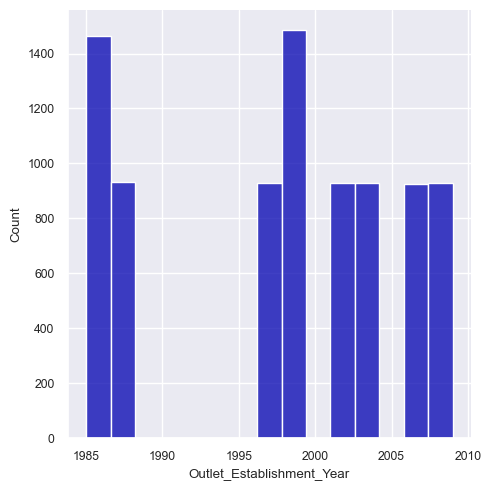

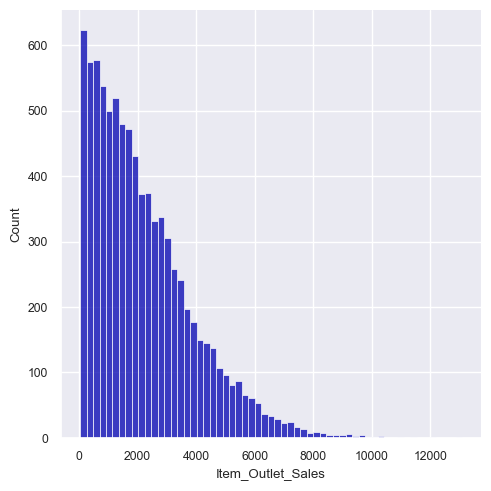

In [593]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num = df.select_dtypes(include=numerics)
for i in df_num:
    sns.displot(data = df_num, x = i)

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

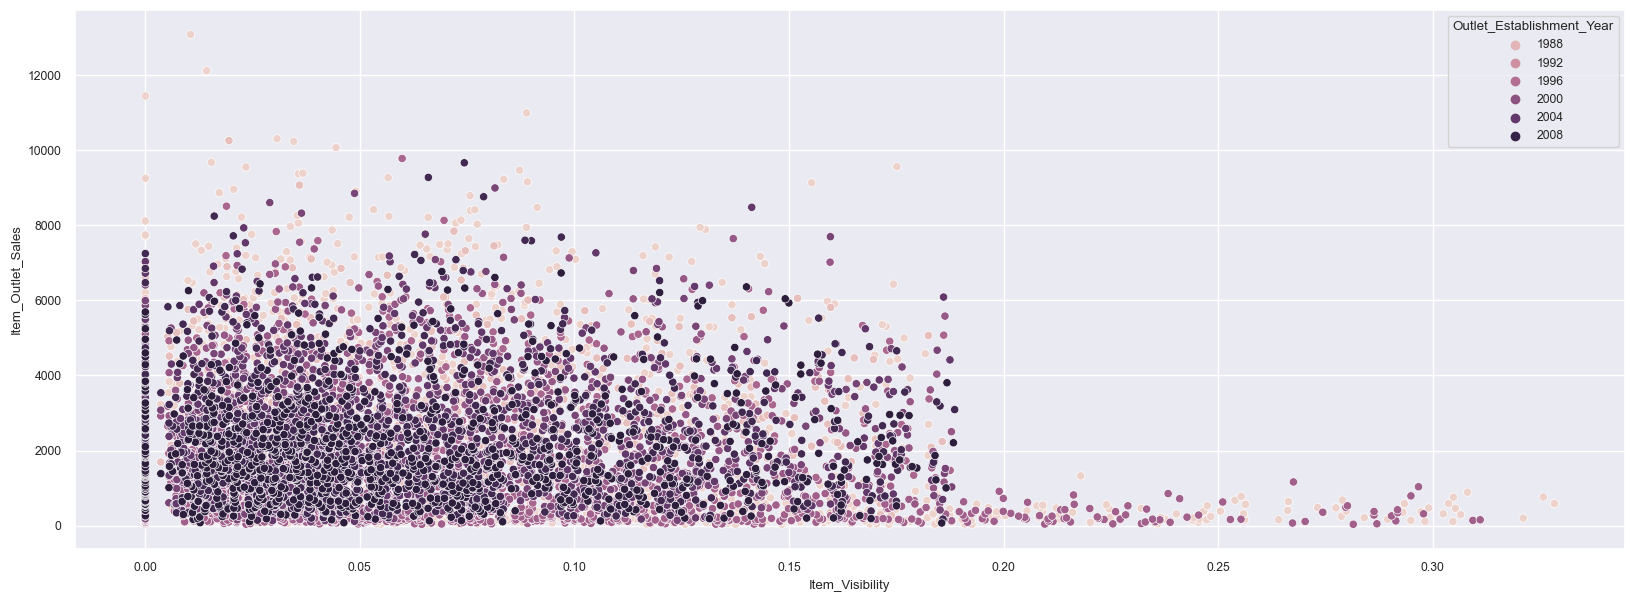

In [594]:
sns.scatterplot(data = df , x ='Item_Visibility' , y ='Item_Outlet_Sales' , hue ='Outlet_Establishment_Year'  ) 

<AxesSubplot:>

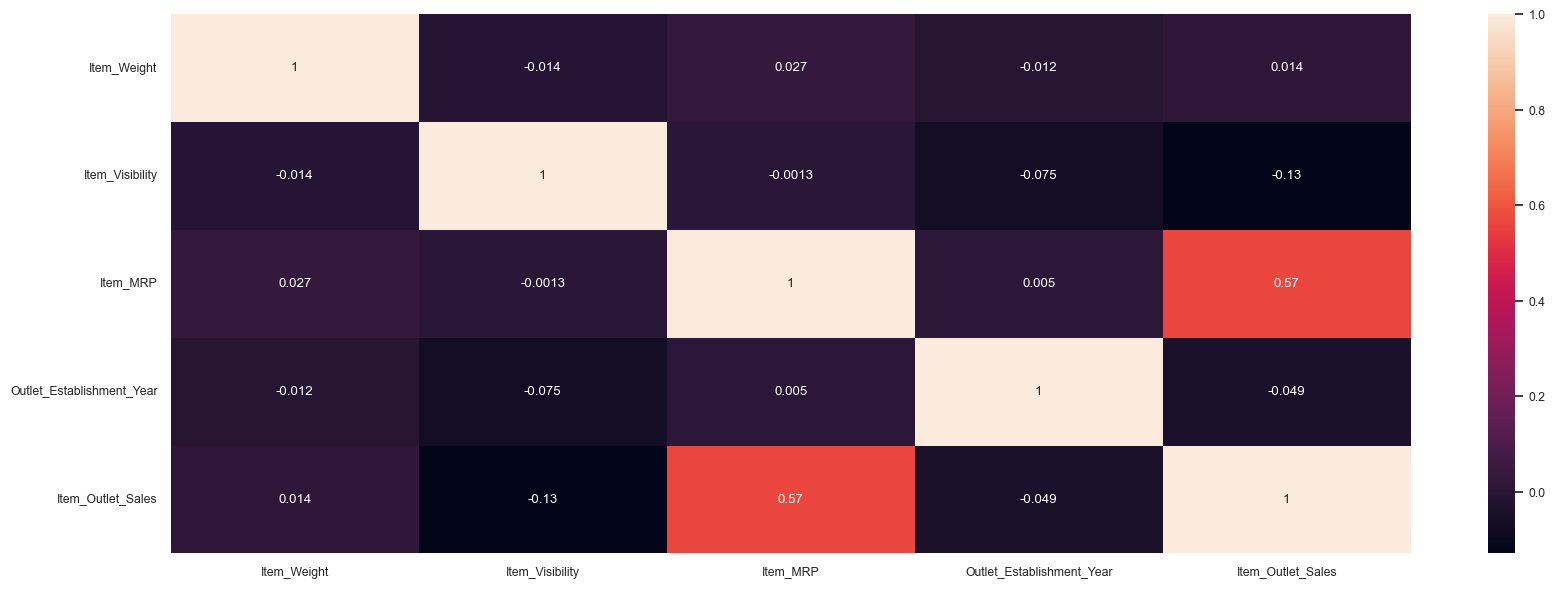

In [595]:
sns.heatmap(df.corr() , annot=True)

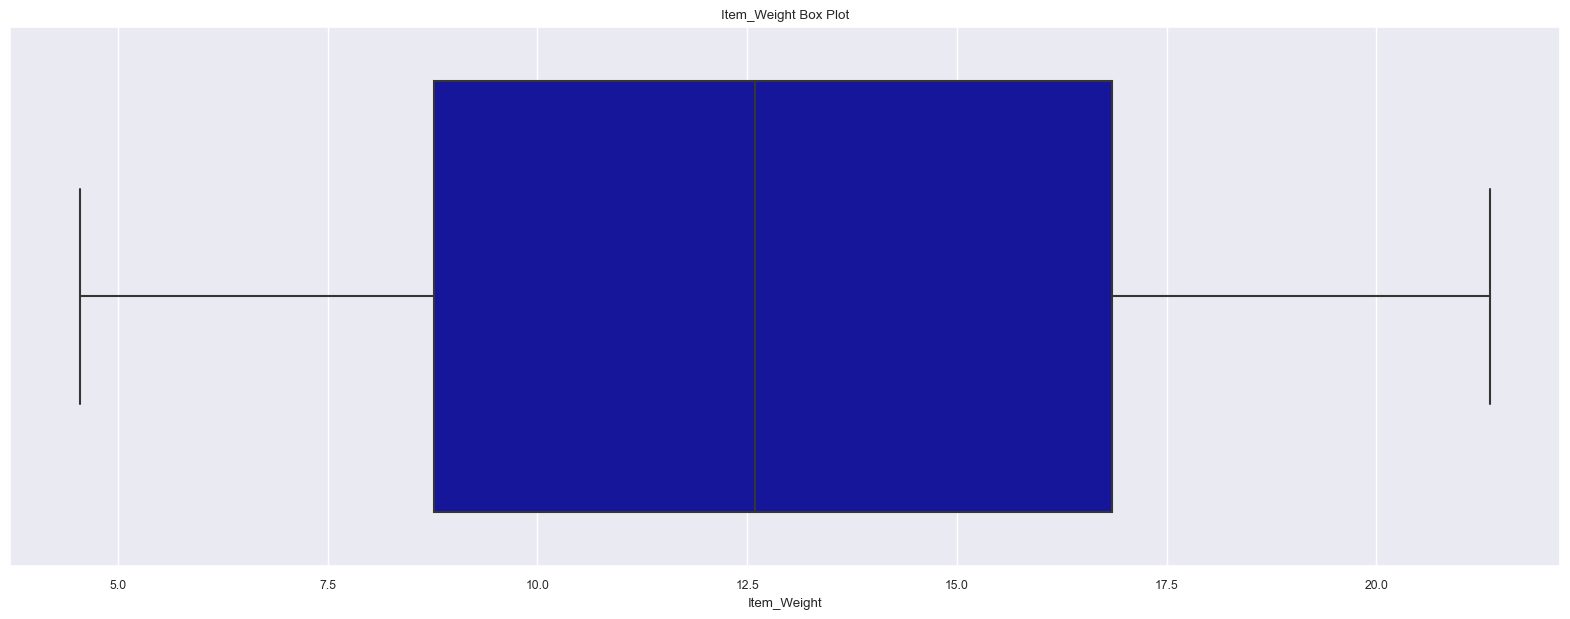

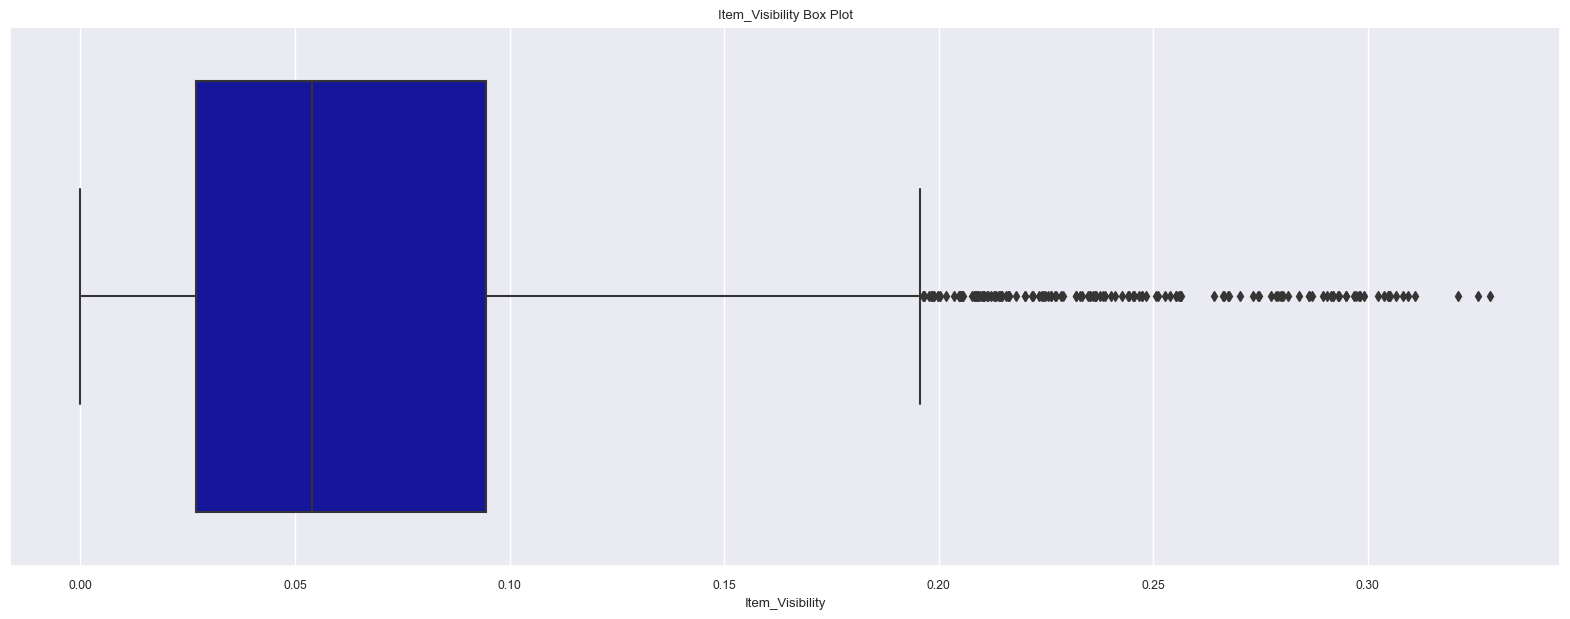

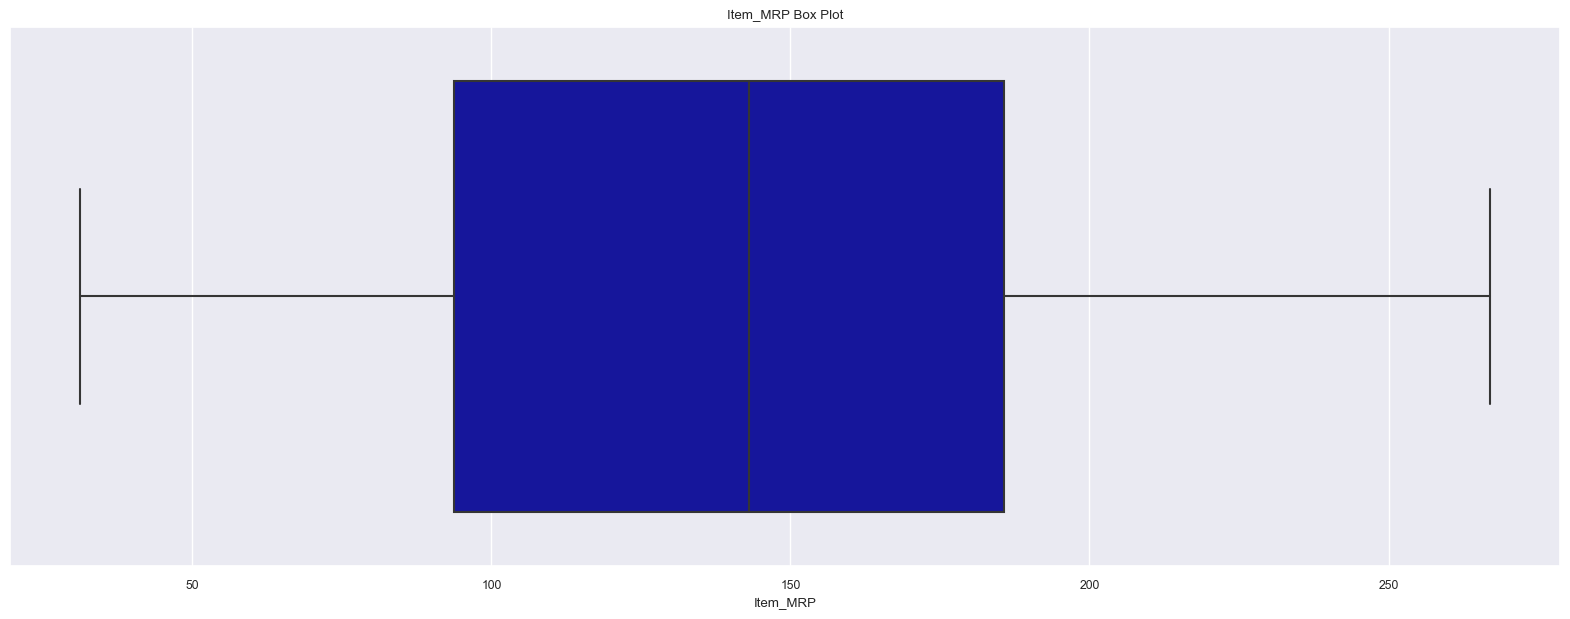

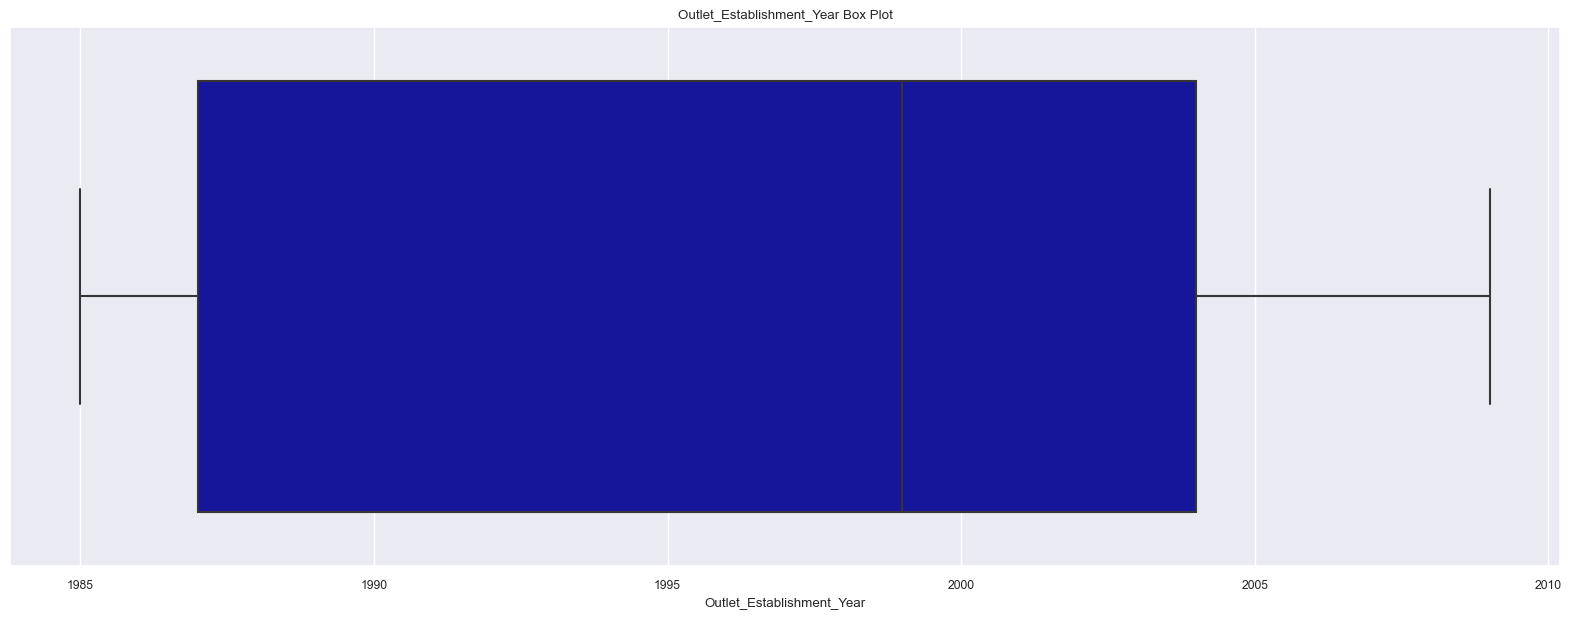

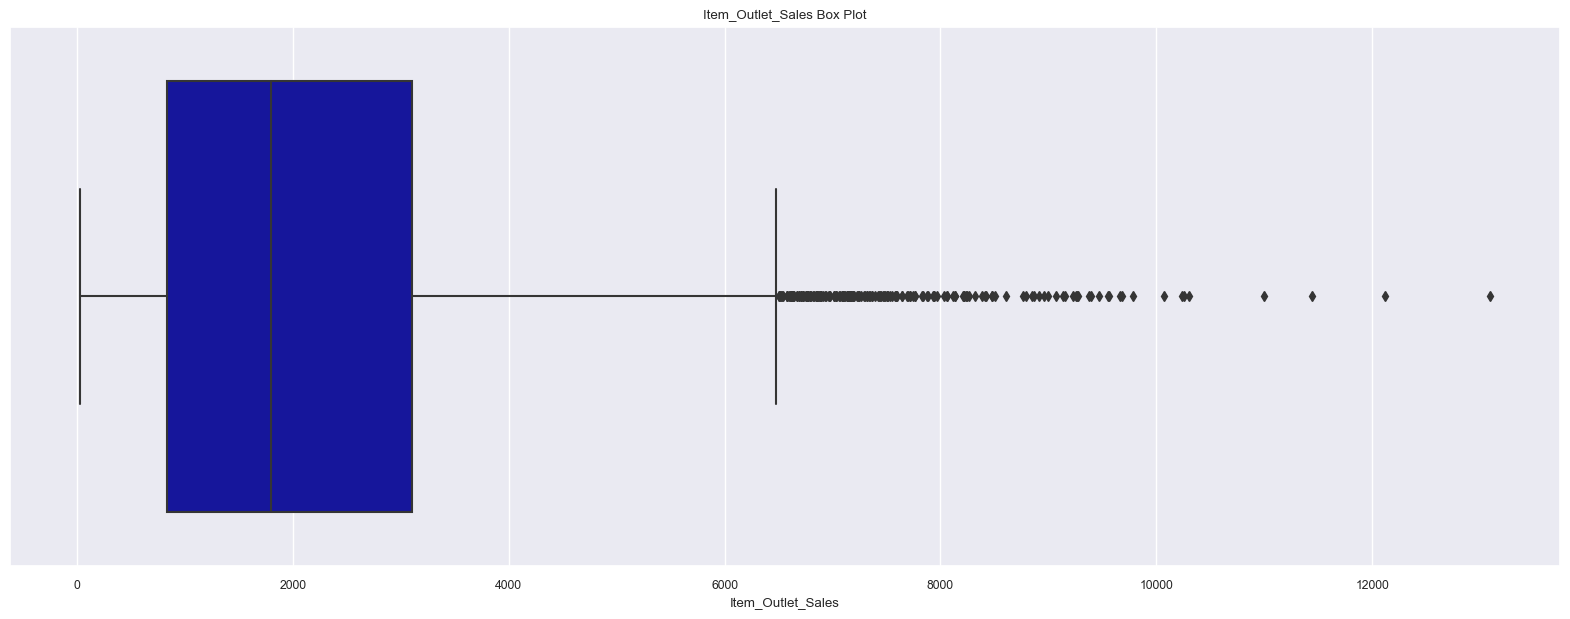

In [596]:
for col in df_num.columns:
    sns.boxplot(df[col])
    plt.title(col + ' Box Plot')
    plt.xlabel(col)
    plt.show()

In [597]:
z = df.select_dtypes(include='object')
z.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [598]:
test = df.groupby([ 'Item_Type','Outlet_Size'])['Item_Outlet_Sales'].sum()
test.to_frame()

Item_Outlet_Sales
Item_Type             Outlet_Size                   
Baking Goods          High              1.497158e+05
                      Medium            4.845007e+05
                      Small             3.225155e+05
Breads                High              5.201829e+04
                      Medium            2.256143e+05
                      Small             1.532745e+05
Breakfast             High              2.735572e+04
                      Medium            1.031431e+05
                      Small             5.147966e+04
Canned                High              1.437322e+05
                      Medium            5.559703e+05
                      Small             3.852685e+05
Dairy                 High              1.962545e+05
                      Medium            5.941286e+05
                      Small             3.762982e+05
Frozen Foods          High              2.036968e+05
                      Medium            7.157510e+05
                      Small             4.719770e+05
Fruits and Vegetables High              3.415268e+05
                      Medium            1.174614e+06
                      Small             6.334528e+05
Hard Drinks           High              5.436257e+04
                      Medium            1.913309e+05
                      Small             9.632595e+04
Health and Hygiene    High              1.191356e+05
                      Medium            4.207743e+05
                      Small             2.623651e+05
Household             High              2.480465e+05
                      Medium            8.293844e+05
                      Small             5.075300e+05
Meat                  High              9.520008e+04
                      Medium            4.160937e+05
                      Small             2.142618e+05
Others                High              3.523813e+04
                      Medium            1.253588e+05
                      Small             8.411051e+04
Seafood               High              8.146729e+03
                      Medium            5.280327e+04
                      Small             5.101027e+04
Snack Foods           High              3.092461e+05
                      Medium            1.142047e+06
                      Small             6.560407e+05
Soft Drinks           High              1.152347e+05
                      Medium            3.339034e+05
                      Small             2.019292e+05
Starchy Foods         High              4.375305e+04
                      Medium            1.243015e+05
                      Small             9.837262e+04

In [599]:
testing = ['Item_Type','Outlet_Size', 'Outlet_Type']
for i in testing :
    x = df.groupby(i)
    print(pd.DataFrame(x.describe()))

                      Item_Weight                                        \
                            count       mean       std    min       25%   
Item_Type                                                                 
Baking Goods                536.0  12.277108  4.773622  4.880   8.23500   
Breads                      204.0  11.346936  4.440540  4.635   7.12875   
Breakfast                    89.0  12.768202  5.038131  6.425   8.06000   
Canned                      539.0  12.305705  4.586564  4.615   8.11500   
Dairy                       566.0  13.426069  4.686532  4.805   9.27750   
Frozen Foods                718.0  12.867061  4.507383  4.555   8.93500   
Fruits and Vegetables      1019.0  13.224769  4.575275  5.460   9.19500   
Hard Drinks                 183.0  11.400328  4.239144  4.610   8.26000   
Health and Hygiene          430.0  13.142314  4.512313  5.175   9.69500   
Household                   759.0  13.384736  4.998845  5.030   8.69500   
Meat                     

In [600]:
categorical = df.dtypes[df.dtypes == "object"].index
df=df.drop_duplicates(categorical)

In [601]:
df

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDU21          NaN          Regular         0.134328   
1              NCL41          NaN          Low Fat         0.073077   
2              FDS40          NaN          Low Fat         0.024546   
3              FDQ36          NaN          Regular         0.000000   
4              FDH28          NaN              reg         0.192650   
...              ...          ...              ...              ...   
8518           FDR25        17.00          Regular         0.140090   
8519           NCX30        16.70          Low Fat         0.026729   
8520           FDY51        12.50          Low Fat         0.081465   
8521           FDU51        20.20          Regular         0.096907   
8522           FDC02        21.35          Low Fat         0.069103   

               Item_Type  Item_MRP Outlet_Identifier  \
0            Snack Foods   35.0558            OUT019   
1     Health and Hygiene   34.3216            OUT019   
2           Frozen Foods   34.6190            OUT019   
3           Baking Goods   38.1848            OUT019   
4           Frozen Foods   37.4506            OUT019   
...                  ...       ...               ...   
8518              Canned  265.1884            OUT018   
8519           Household  248.4776            OUT018   
8520                Meat  220.7798            OUT018   
8521                Meat  175.5028            OUT018   
8522              Canned  259.9278            OUT018   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1985       Small               Tier 1   
1                          1985       Small               Tier 1   
2                          1985       Small               Tier 1   
3                          1985       Small               Tier 1   
4                          1985       Small               Tier 1   
...                         ...         ...                  ...   
8518                       2009      Medium               Tier 3   
8519                       2009      Medium               Tier 3   
8520                       2009      Medium               Tier 3   
8521                       2009      Medium               Tier 3   
8522                       2009      Medium               Tier 3   

            Outlet_Type  Item_Outlet_Sales  
0         Grocery Store            33.9558  
1         Grocery Store            34.6216  
2         Grocery Store            36.6190  
3         Grocery Store            37.2848  
4         Grocery Store            37.9506  
...                 ...                ...  
8518  Supermarket Type2          6359.7216  
8519  Supermarket Type2          6439.6176  
8520  Supermarket Type2          6611.3940  
8521  Supermarket Type2          6729.9064  
8522  Supermarket Type2          6768.5228  

[8523 rows x 12 columns]

In [602]:
df.duplicated().sum()

0

## Exploratory Data Analysis

In [603]:
df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDU21          NaN          Regular         0.134328   
1           NCL41          NaN          Low Fat         0.073077   
2           FDS40          NaN          Low Fat         0.024546   
3           FDQ36          NaN          Regular         0.000000   
4           FDH28          NaN              reg         0.192650   

            Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
0         Snack Foods   35.0558            OUT019                       1985   
1  Health and Hygiene   34.3216            OUT019                       1985   
2        Frozen Foods   34.6190            OUT019                       1985   
3        Baking Goods   38.1848            OUT019                       1985   
4        Frozen Foods   37.4506            OUT019                       1985   

  Outlet_Size Outlet_Location_Type    Outlet_Type  Item_Outlet_Sales  
0       Small               Tier 1  Grocery Store            33.9558  
1       Small               Tier 1  Grocery Store            34.6216  
2       Small               Tier 1  Grocery Store            36.6190  
3       Small               Tier 1  Grocery Store            37.2848  
4       Small               Tier 1  Grocery Store            37.9506

In [604]:
df.tail()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
8518           FDR25        17.00          Regular         0.140090   
8519           NCX30        16.70          Low Fat         0.026729   
8520           FDY51        12.50          Low Fat         0.081465   
8521           FDU51        20.20          Regular         0.096907   
8522           FDC02        21.35          Low Fat         0.069103   

      Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
8518     Canned  265.1884            OUT018                       2009   
8519  Household  248.4776            OUT018                       2009   
8520       Meat  220.7798            OUT018                       2009   
8521       Meat  175.5028            OUT018                       2009   
8522     Canned  259.9278            OUT018                       2009   

     Outlet_Size Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
8518      Medium               Tier 3  Supermarket Type2          6359.7216  
8519      Medium               Tier 3  Supermarket Type2          6439.6176  
8520      Medium               Tier 3  Supermarket Type2          6611.3940  
8521      Medium               Tier 3  Supermarket Type2          6729.9064  
8522      Medium               Tier 3  Supermarket Type2          6768.5228

In [605]:
def check_data_describing(df):
    print(f"number of row = {df.shape[0]} , number of coulmns = {df.shape[1]} ")
    print('\n*********************************')
    print(df.describe().transpose())
    print('\n *********************************')
check_data_describing(df)

number of row = 8523 , number of coulmns = 12 

*********************************
                            count         mean          std       min  \
Item_Weight                7060.0    12.857645     4.643456     4.555   
Item_Visibility            8523.0     0.066132     0.051598     0.000   
Item_MRP                   8523.0   140.992782    62.275067    31.290   
Outlet_Establishment_Year  8523.0  1997.831867     8.371760  1985.000   
Item_Outlet_Sales          8523.0  2181.288914  1706.499616    33.290   

                                   25%          50%          75%           max  
Item_Weight                   8.773750    12.600000    16.850000     21.350000  
Item_Visibility               0.026989     0.053931     0.094585      0.328391  
Item_MRP                     93.826500   143.012800   185.643700    266.888400  
Outlet_Establishment_Year  1987.000000  1999.000000  2004.000000   2009.000000  
Item_Outlet_Sales           834.247400  1794.331000  3101.296400  13086.96

In [606]:
categorical = df.dtypes[df.dtypes == "object"].index
df[categorical].describe().transpose()

count unique                    top  freq
Item_Identifier       8523   1559                  FDG33    10
Item_Fat_Content      8523      5                Low Fat  5089
Item_Type             8523     16  Fruits and Vegetables  1232
Outlet_Identifier     8523     10                 OUT027   935
Outlet_Size           6113      3                 Medium  2793
Outlet_Location_Type  8523      3                 Tier 3  3350
Outlet_Type           8523      4      Supermarket Type1  5577

In [607]:
def dirty_data_finding(df):
    dirty = []
    columns = df.columns
    for col in columns:
        dtype = df[col].dtypes
        nunique = df[col].nunique()
        null = df[col].isnull().sum()
        duplicates = df[col].duplicated().sum()
        dirty.append([col,dtype,nunique,null,duplicates])
    df_dirty_data_finding = pd.DataFrame(dirty)
    df_dirty_data_finding.columns = ['column','dtype','nunique','null','duplicates']
    return df_dirty_data_finding

dirty_data_finding(df)

column    dtype  nunique  null  duplicates
0             Item_Identifier   object     1559     0        6964
1                 Item_Weight  float64      415  1463        8107
2            Item_Fat_Content   object        5     0        8518
3             Item_Visibility  float64     7880     0         643
4                   Item_Type   object       16     0        8507
5                    Item_MRP  float64     5938     0        2585
6           Outlet_Identifier   object       10     0        8513
7   Outlet_Establishment_Year    int64        9     0        8514
8                 Outlet_Size   object        3  2410        8519
9        Outlet_Location_Type   object        3     0        8520
10                Outlet_Type   object        4     0        8519
11          Item_Outlet_Sales  float64     3493     0        5030

In [608]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

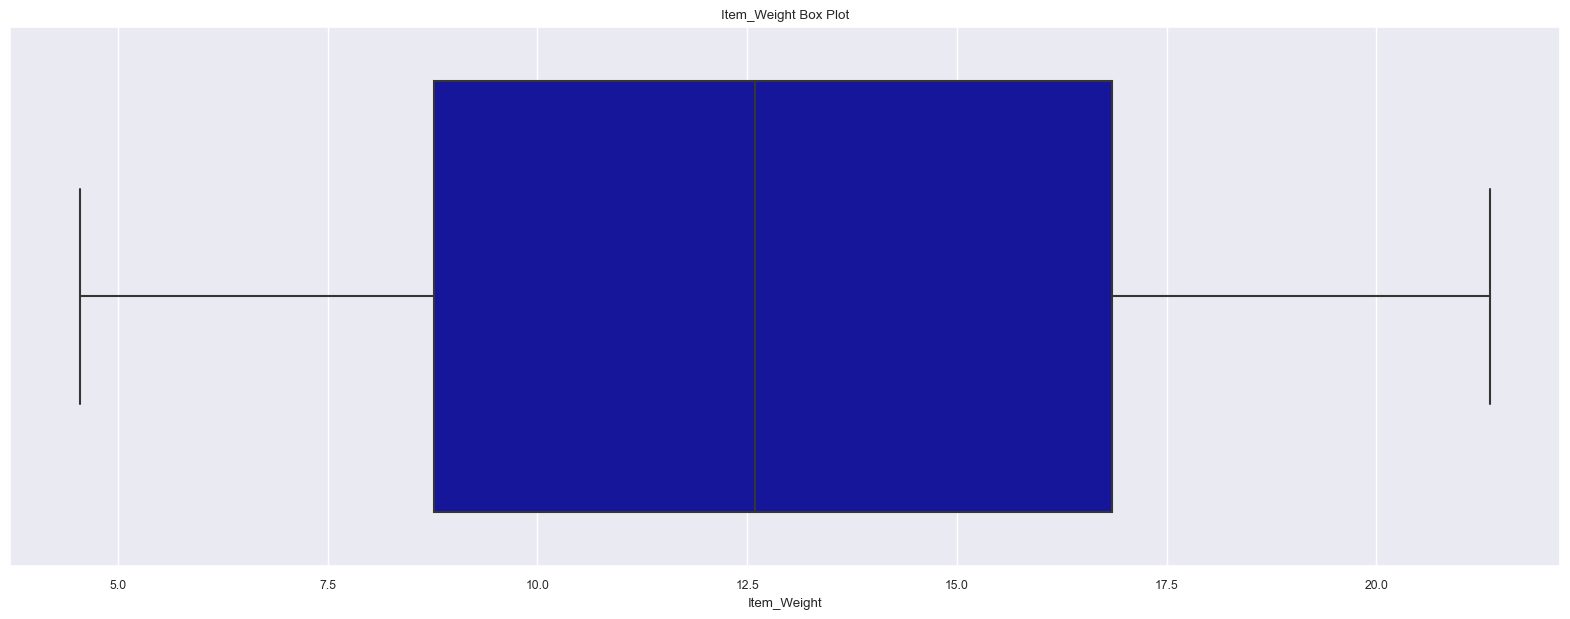

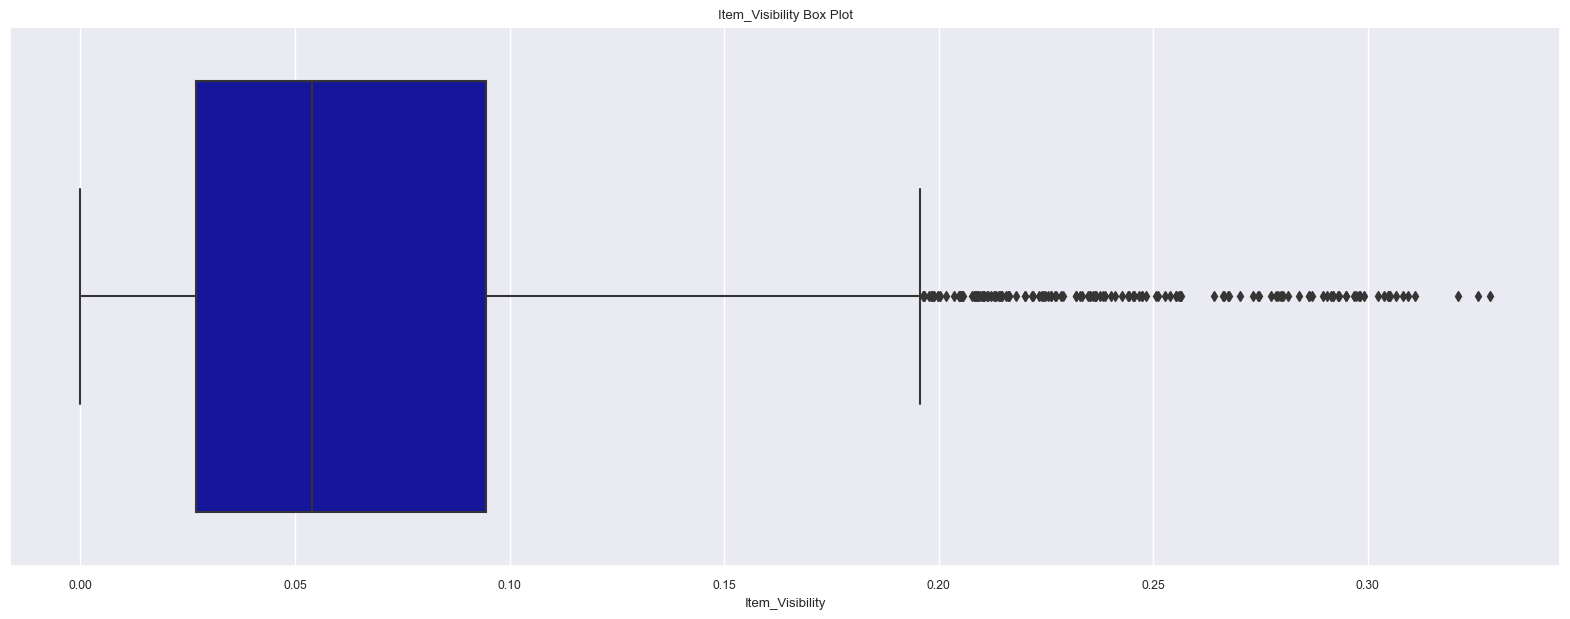

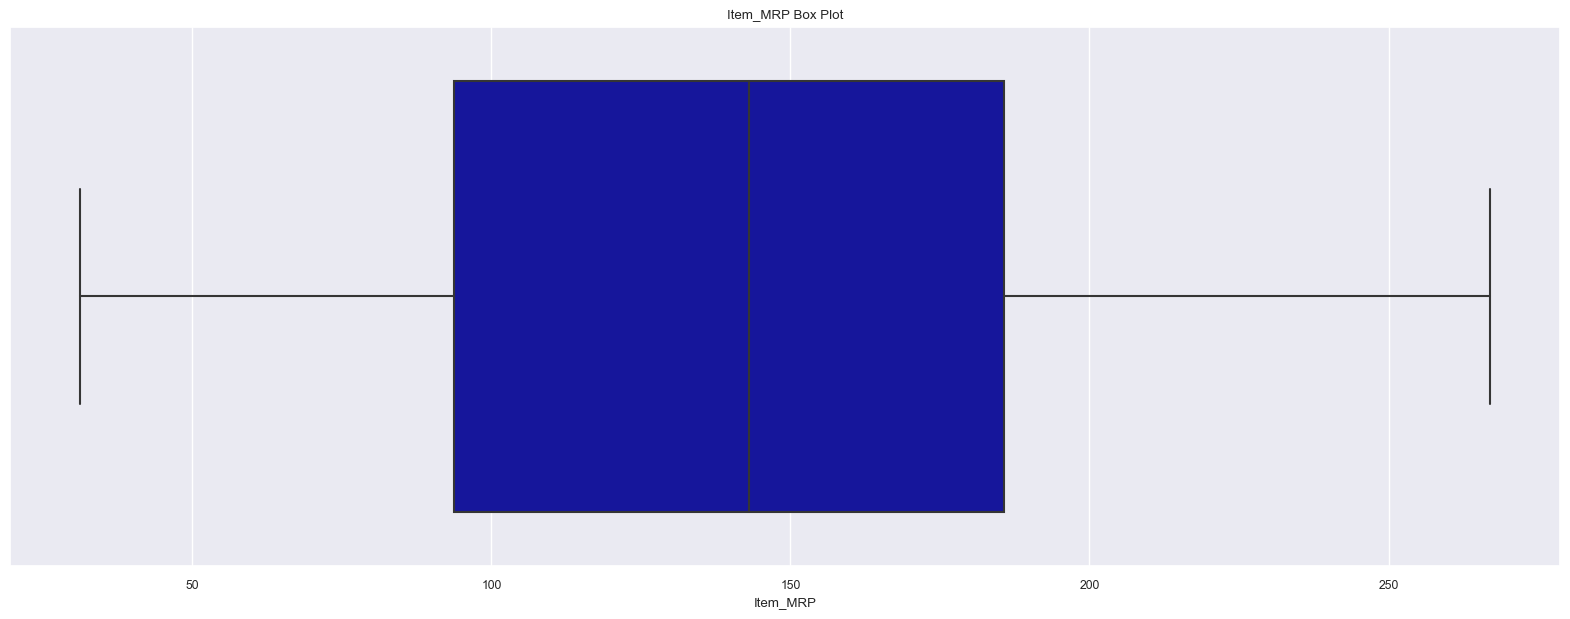

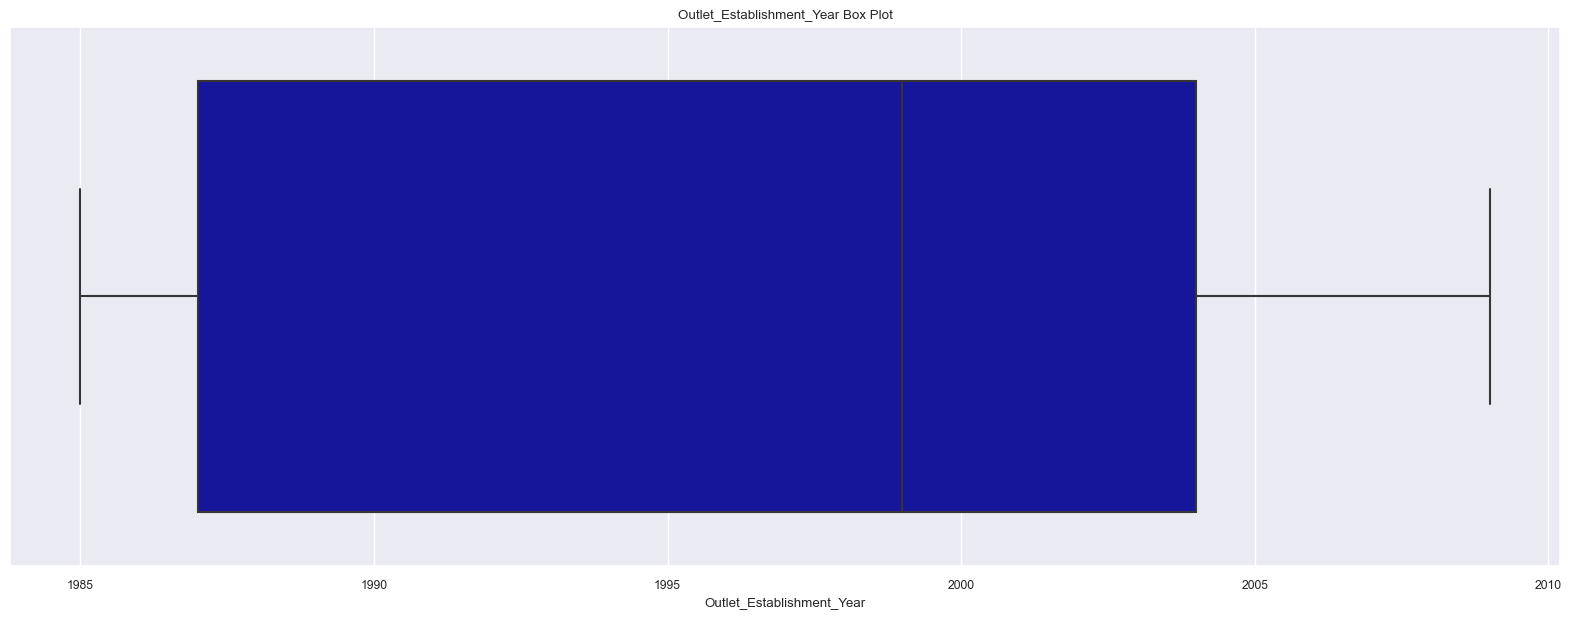

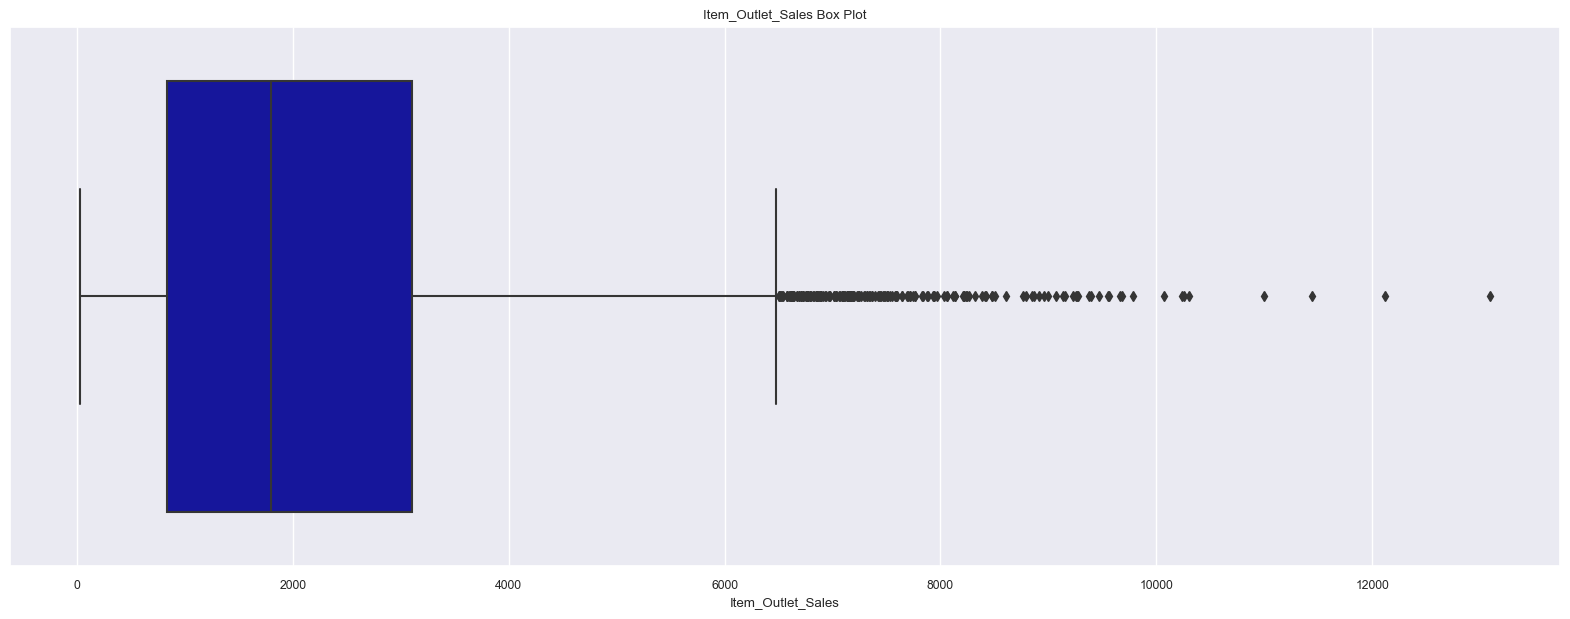

In [609]:
for col in df_num.columns:
    sns.boxplot(df[col])
    plt.title(col + ' Box Plot')
    plt.xlabel(col)
    plt.show()
### we have outliers in 2 features ('Item_Outlet_Sales' this is the target , Item_Visibility )

In [610]:
df['Item_Visibility'].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

In [611]:
Item_Visibility_outliers=df[df['Item_Visibility']>0.20].index
df.drop(Item_Visibility_outliers , axis = 0 , inplace=True )

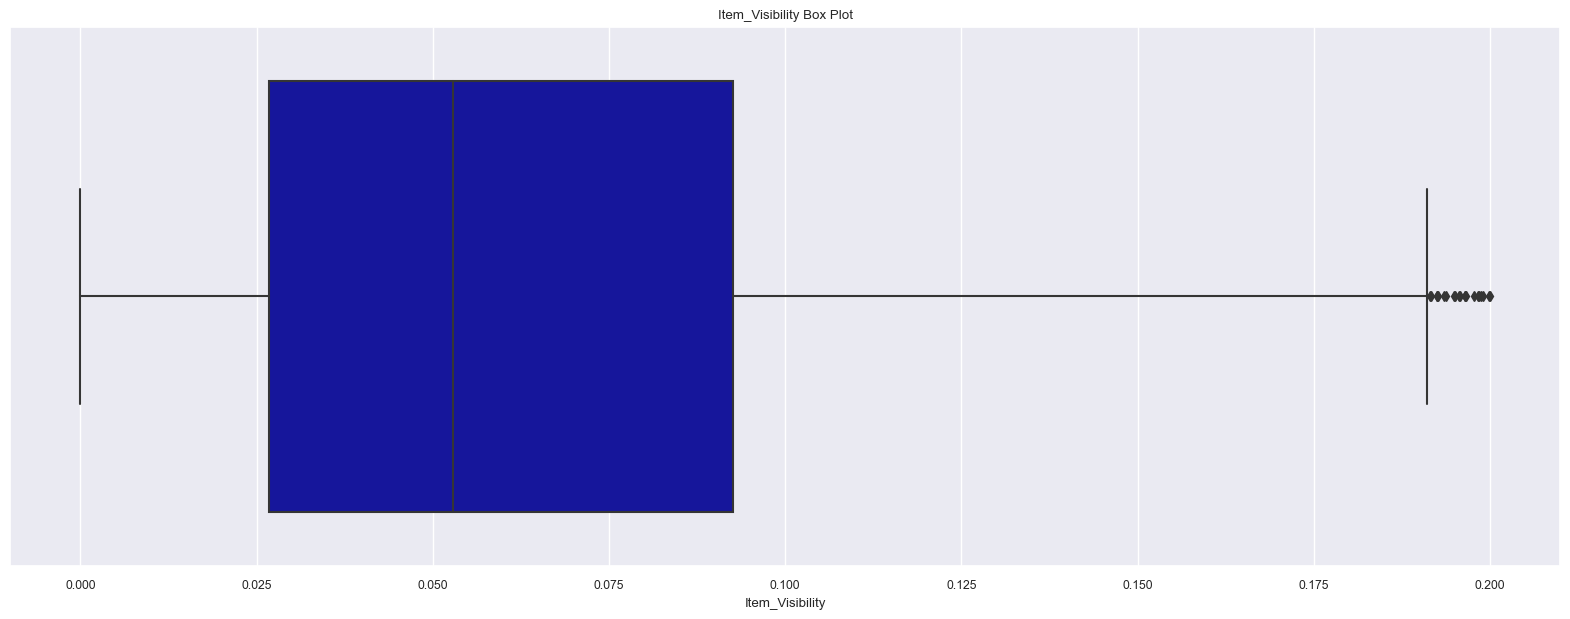

In [612]:
sns.boxplot(df['Item_Visibility'])
plt.title('Item_Visibility' + ' Box Plot')
plt.xlabel('Item_Visibility')
plt.show()

In [613]:
df['Item_Outlet_Sales'].describe()

count     8389.000000
mean      2210.748304
std       1703.691939
min         33.290000
25%        872.863800
50%       1829.618400
75%       3124.599400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [614]:
df[df['Item_Outlet_Sales']>3101.296400] ### we can't remove outliers from the target data but we need to handle it by normlization it 

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
945            DRI39          NaN          Low Fat         0.096592   
946            NCO17          NaN          Low Fat         0.073024   
947            FDN57          NaN          Low Fat         0.053972   
948            FDL56          NaN          Low Fat         0.125172   
949            FDA36          NaN          Low Fat         0.005639   
...              ...          ...              ...              ...   
8518           FDR25        17.00          Regular         0.140090   
8519           NCX30        16.70          Low Fat         0.026729   
8520           FDY51        12.50          Low Fat         0.081465   
8521           FDU51        20.20          Regular         0.096907   
8522           FDC02        21.35          Low Fat         0.069103   

                  Item_Type  Item_MRP Outlet_Identifier  \
945                   Dairy   54.8930            OUT027   
946      Health and Hygiene  121.8440            OUT027   
947             Snack Foods  141.2154            OUT027   
948   Fruits and Vegetables   88.9198            OUT027   
949            Baking Goods  184.9924            OUT027   
...                     ...       ...               ...   
8518                 Canned  265.1884            OUT018   
8519              Household  248.4776            OUT018   
8520                   Meat  220.7798            OUT018   
8521                   Meat  175.5028            OUT018   
8522                 Canned  259.9278            OUT018   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
945                        1985      Medium               Tier 3   
946                        1985      Medium               Tier 3   
947                        1985      Medium               Tier 3   
948                        1985      Medium               Tier 3   
949                        1985      Medium               Tier 3   
...                         ...         ...                  ...   
8518                       2009      Medium               Tier 3   
8519                       2009      Medium               Tier 3   
8520                       2009      Medium               Tier 3   
8521                       2009      Medium               Tier 3   
8522                       2009      Medium               Tier 3   

            Outlet_Type  Item_Outlet_Sales  
945   Supermarket Type3          3112.6150  
946   Supermarket Type3          3115.9440  
947   Supermarket Type3          3119.9388  
948   Supermarket Type3          3139.9128  
949   Supermarket Type3          3146.5708  
...                 ...                ...  
8518  Supermarket Type2          6359.7216  
8519  Supermarket Type2          6439.6176  
8520  Supermarket Type2          6611.3940  
8521  Supermarket Type2          6729.9064  
8522  Supermarket Type2          6768.5228  

[2128 rows x 12 columns]

### Univariate Analysis

In [615]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [616]:
df['Item_Weight'].describe()

count    6998.000000
mean       12.868258
std         4.643758
min         4.555000
25%         8.777500
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

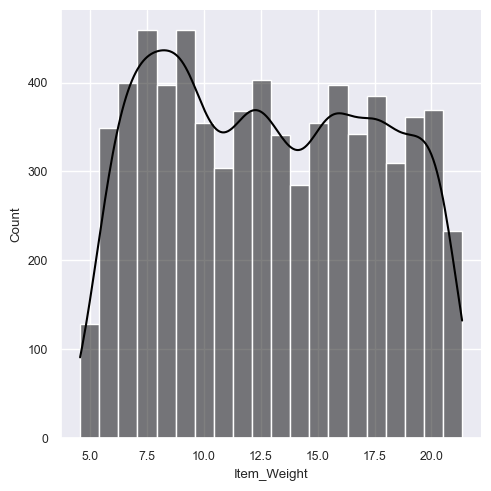

In [617]:
sns.displot(data = df , x ='Item_Weight' , kde =True , color='black')

<AxesSubplot:xlabel='Item_Weight'>

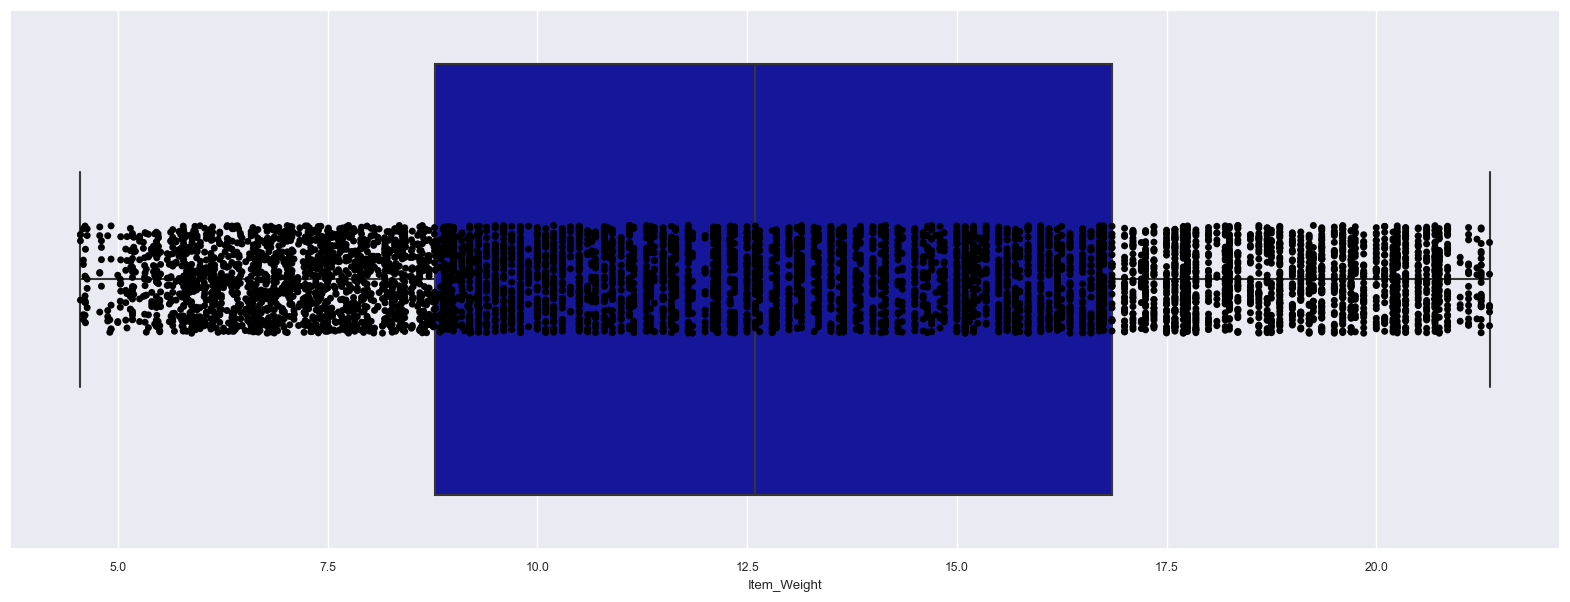

In [618]:
sns.boxplot(data = df , x ='Item_Weight')
sns.stripplot(data = df , x ='Item_Weight' , color = 'black')

In [619]:
df['Item_Weight'].isnull().sum()

1391

In [620]:
fig = px.scatter(df, x='Item_Outlet_Sales', y='Item_Weight',  height=600)
fig.show()

<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

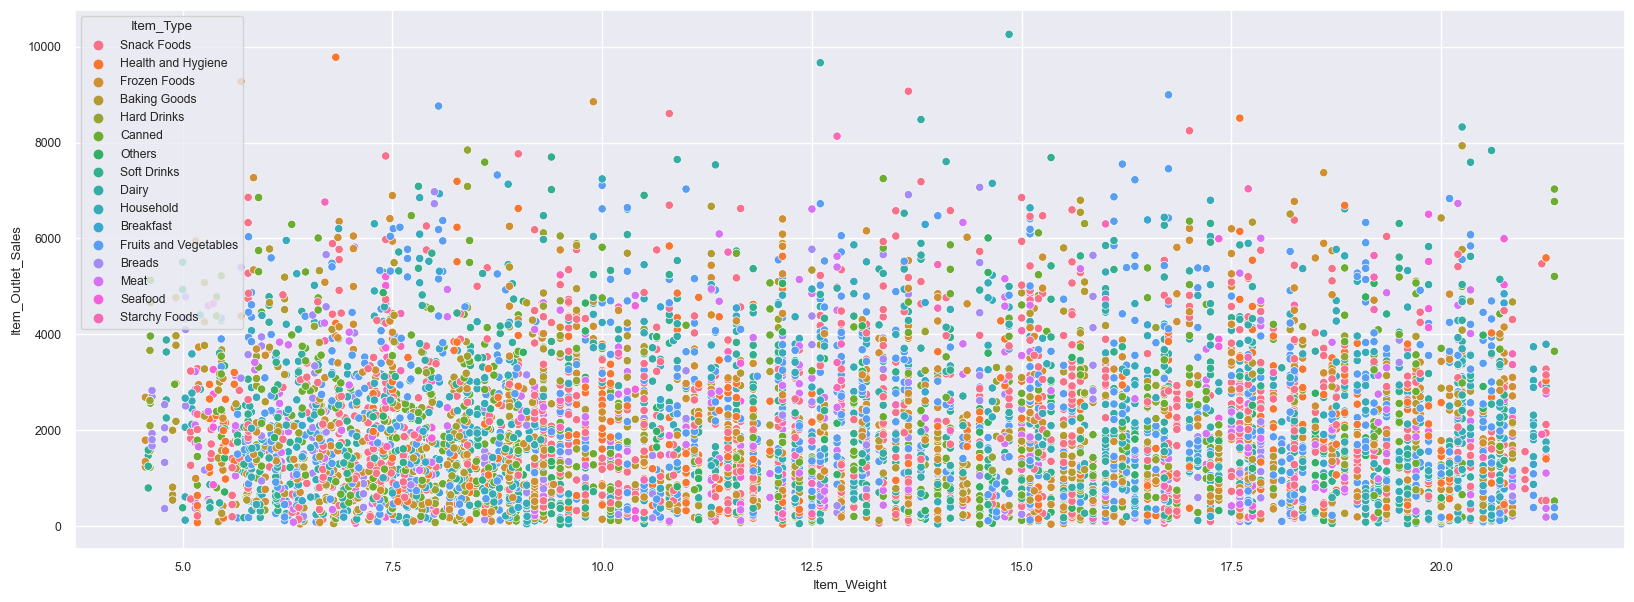

In [621]:
sns.scatterplot(data = df , x = 'Item_Weight' , y = df['Item_Outlet_Sales'] , hue = df['Item_Type'])

<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

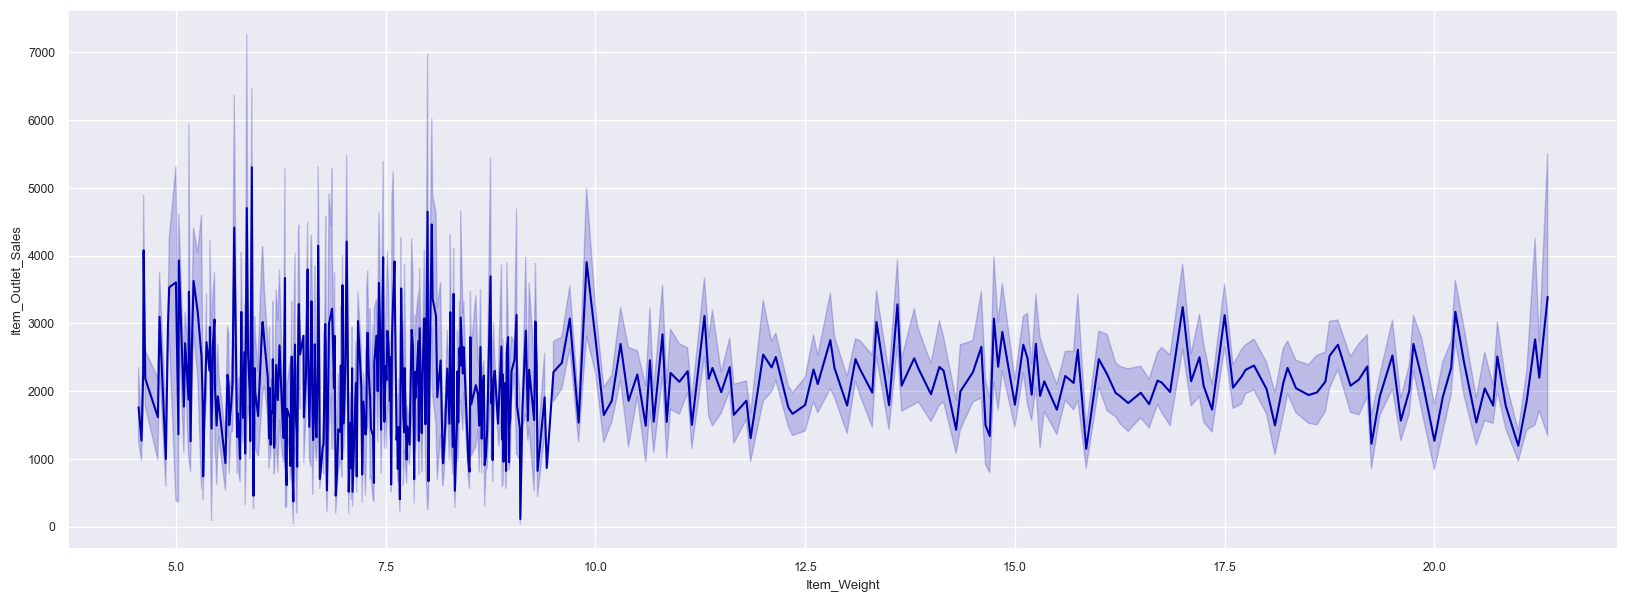

In [622]:
fig = sns.lineplot(data = df , x ='Item_Weight' , y = df['Item_Outlet_Sales'] , markers='d'
                     , markevery = 1 , palette='viridis')
fig

<AxesSubplot:xlabel='Item_Weight'>

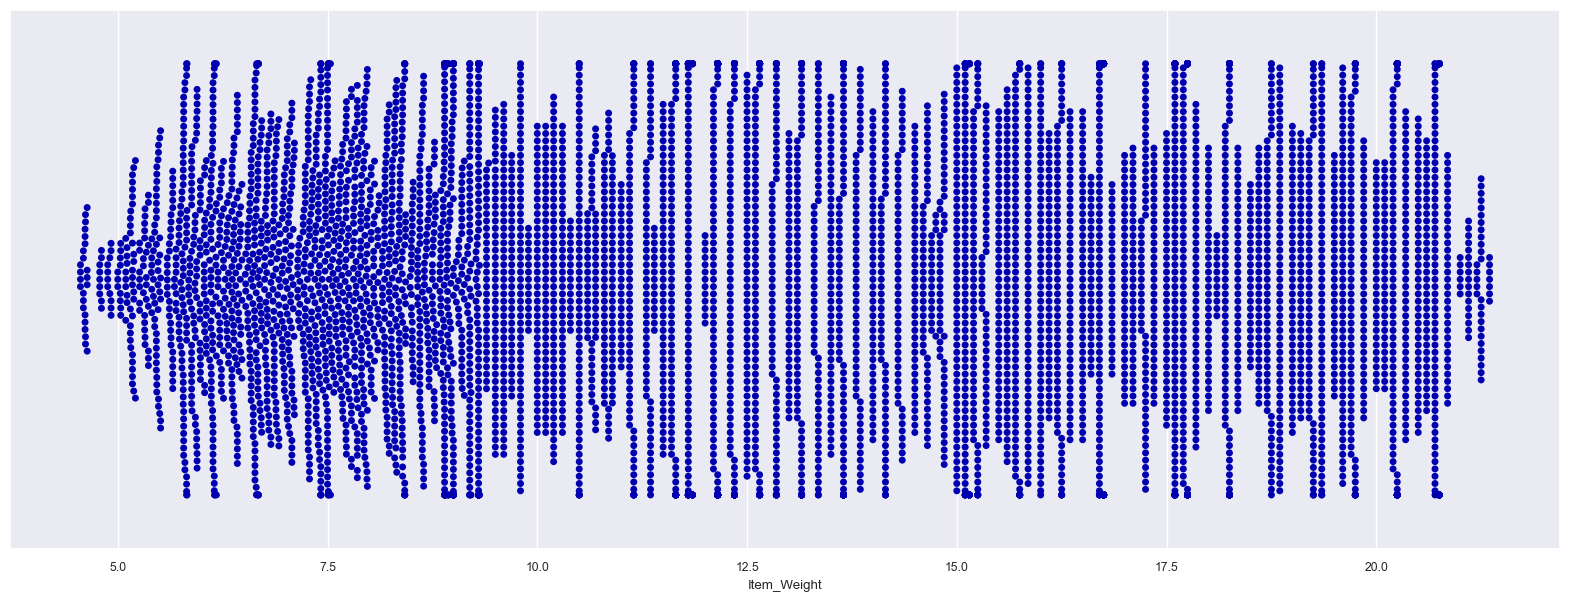

In [623]:
sns.swarmplot(data = df , x =df['Item_Weight'])

In [624]:
df['Item_Fat_Content'].value_counts()

Low Fat    5024
Regular    2832
LF          307
reg         117
low fat     109
Name: Item_Fat_Content, dtype: int64

In [625]:
def clean_Item_Fat_Content(x):
    if x in ['reg']:
        return 'Regular'
    elif x in ['LF' , 'low fat']:
        return 'Low Fat'
    else :
        return x

In [626]:
df['Item_Fat_Content']= df['Item_Fat_Content'].apply(clean_Item_Fat_Content)
df1['Item_Fat_Content']= df1['Item_Fat_Content'].apply(clean_Item_Fat_Content)

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

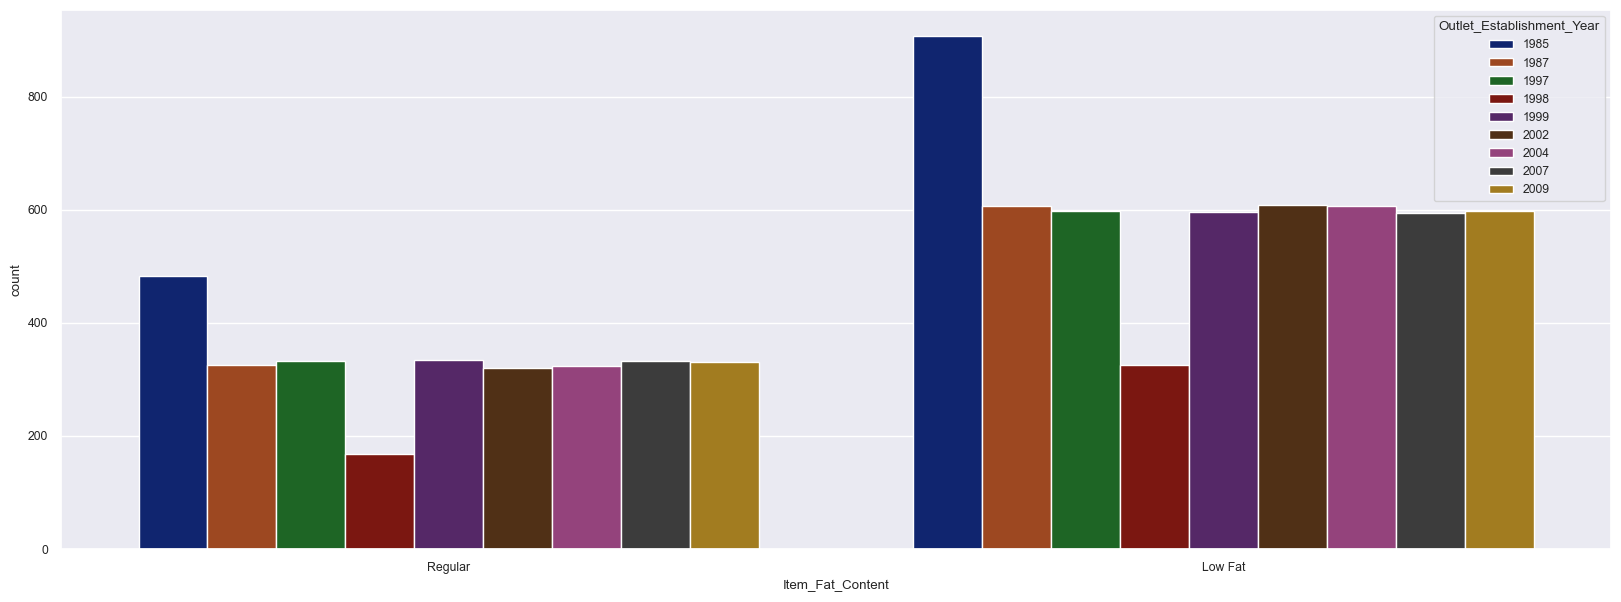

In [627]:
sns.countplot(data = df , x= 'Item_Fat_Content', hue='Outlet_Establishment_Year', palette="dark")

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

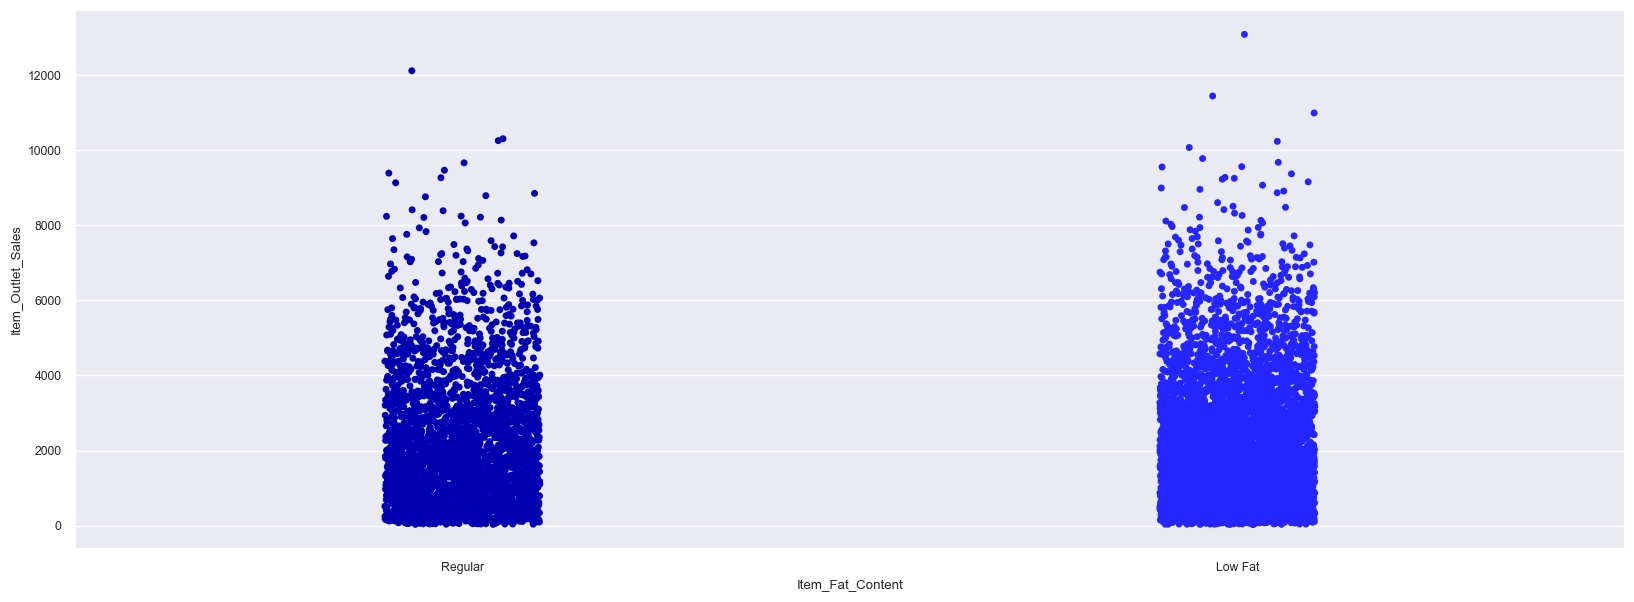

In [628]:
sns.stripplot(data = df , x= 'Item_Fat_Content' , y = 'Item_Outlet_Sales' )

In [629]:
df['Item_Visibility'].describe()

count    8389.000000
mean        0.063222
std         0.046337
min         0.000000
25%         0.026818
50%         0.052800
75%         0.092564
max         0.199955
Name: Item_Visibility, dtype: float64

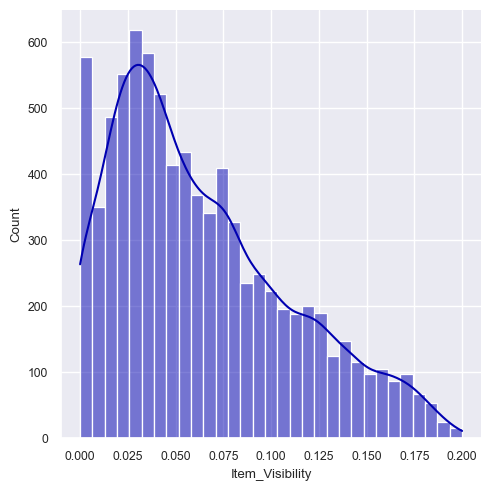

In [630]:
sns.displot(data = df  , x = df['Item_Visibility'], kde = True ) ### skweed to the right 

<AxesSubplot:xlabel='Item_Visibility'>

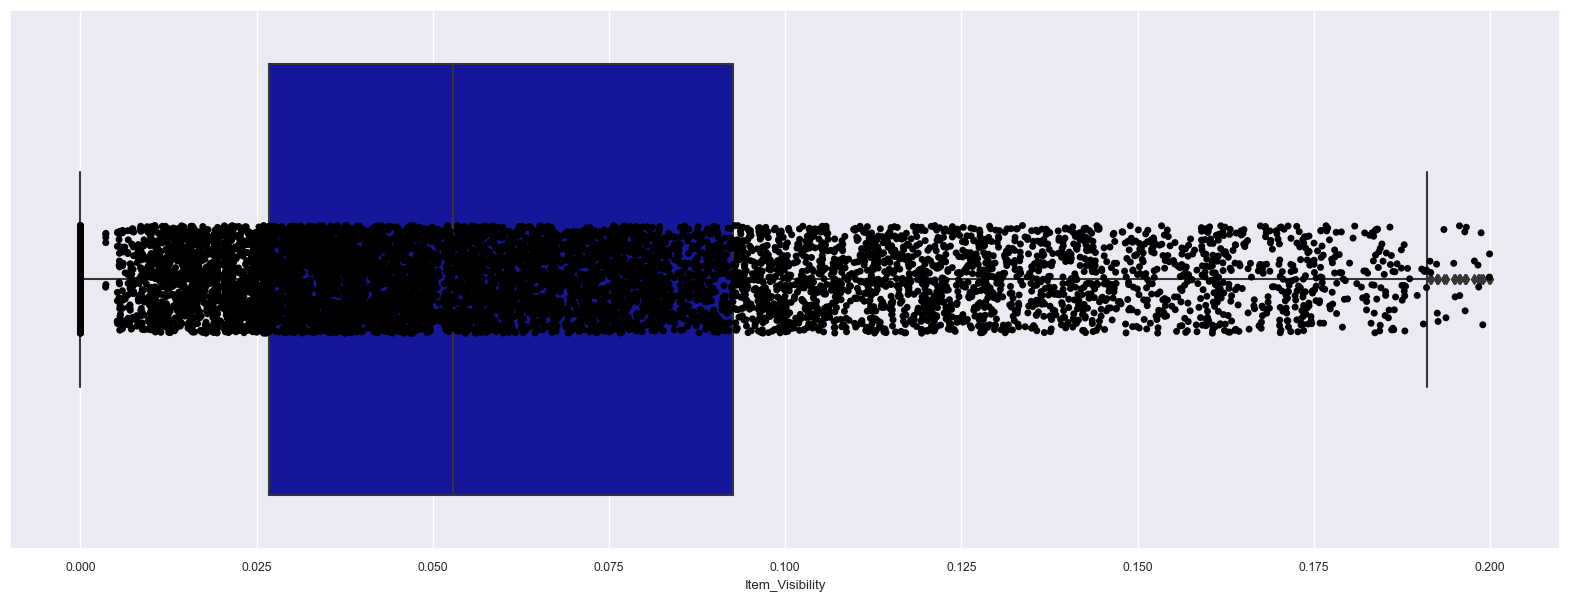

In [631]:
sns.boxplot(data = df , x ='Item_Visibility')
sns.stripplot(data = df , x= 'Item_Visibility' , color='Black')

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_Visibility'>

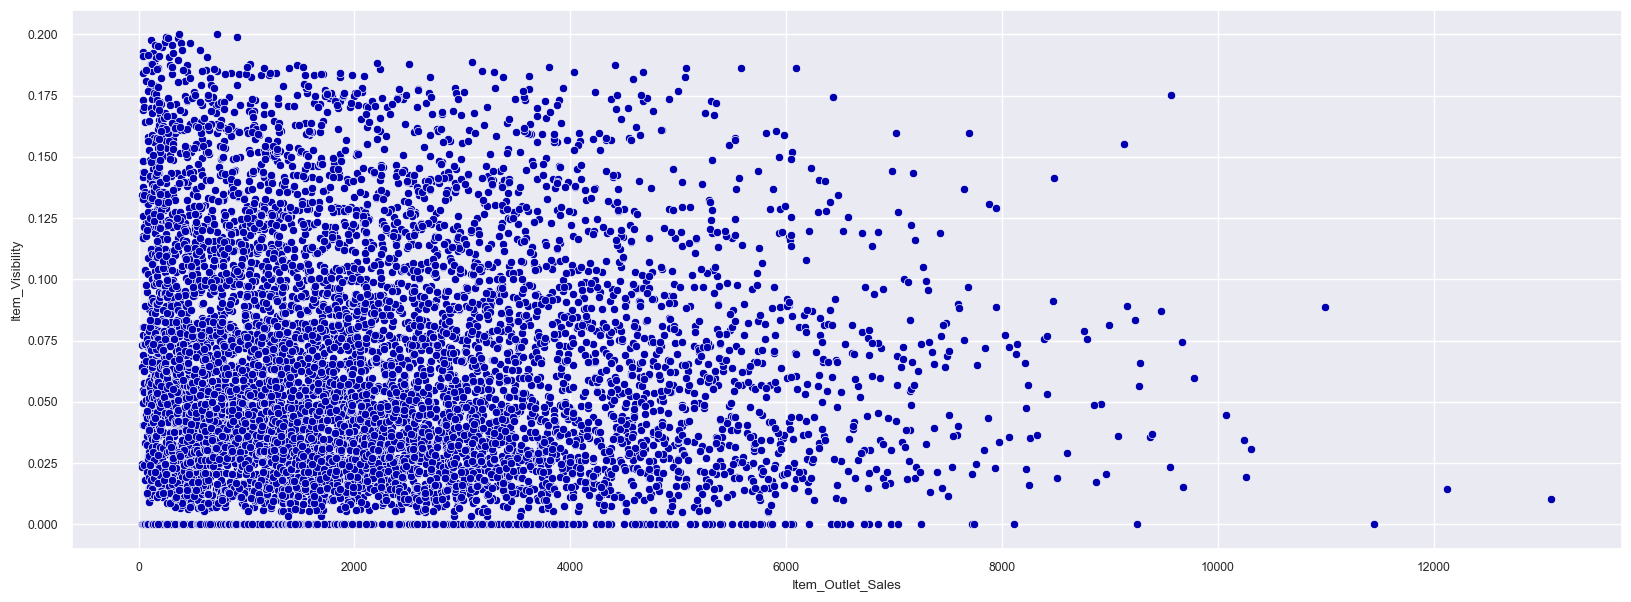

In [632]:
sns.scatterplot(data = df , y ='Item_Visibility' , x ='Item_Outlet_Sales' , palette='viridis')

In [633]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1209
Snack Foods              1182
Household                 899
Frozen Foods              845
Dairy                     670
Canned                    639
Baking Goods              633
Health and Hygiene        516
Soft Drinks               440
Meat                      419
Breads                    248
Hard Drinks               211
Others                    168
Starchy Foods             143
Breakfast                 106
Seafood                    61
Name: Item_Type, dtype: int64

<AxesSubplot:>

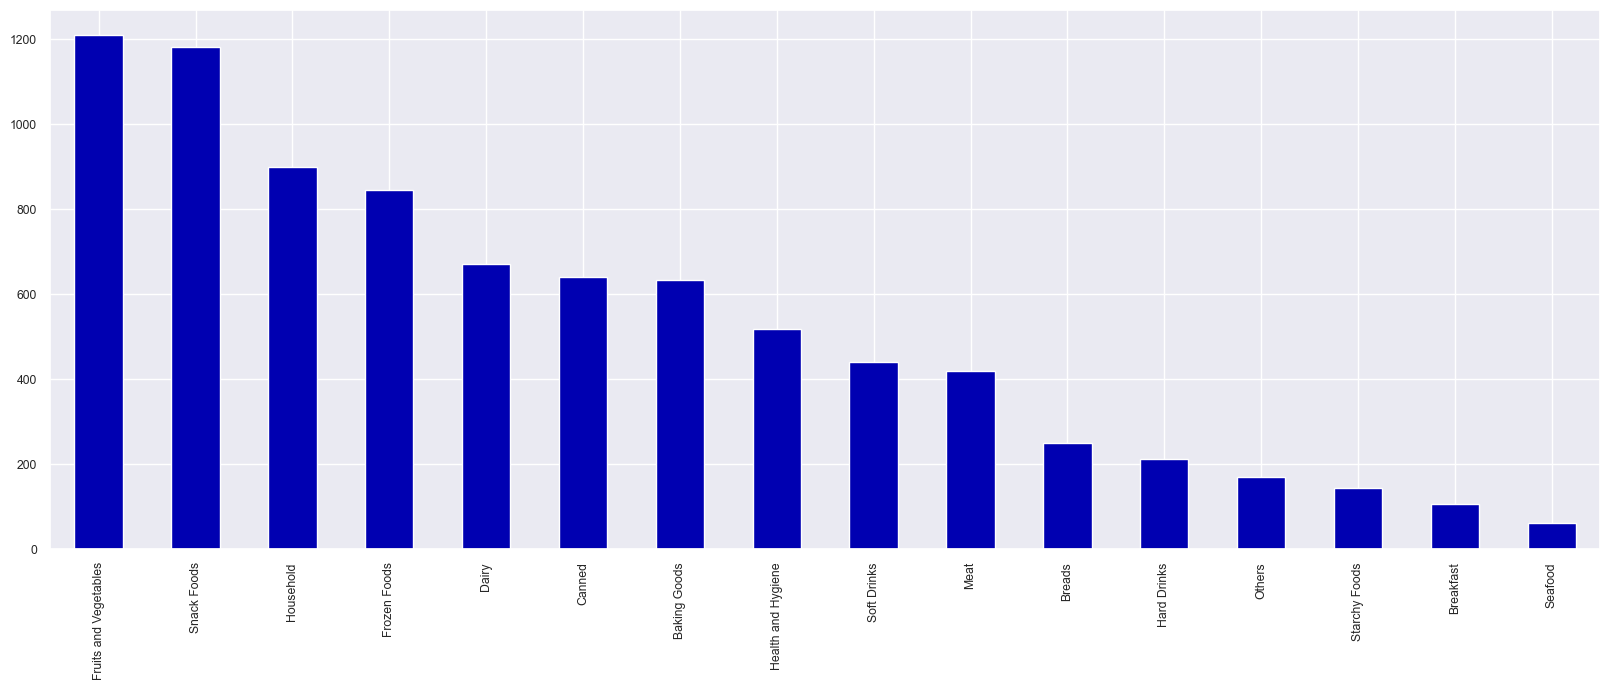

In [634]:
df['Item_Type'].value_counts().plot.bar()

In [635]:
df.groupby('Item_Type')['Item_Outlet_Sales'].sum().sort_values(ascending = False).to_frame()

Item_Outlet_Sales
Item_Type                               
Fruits and Vegetables       2.812795e+06
Snack Foods                 2.728189e+06
Household                   2.050069e+06
Frozen Foods                1.821346e+06
Dairy                       1.518133e+06
Canned                      1.440143e+06
Baking Goods                1.260805e+06
Health and Hygiene          1.044006e+06
Meat                        9.160356e+05
Soft Drinks                 8.907019e+05
Breads                      5.522491e+05
Hard Drinks                 4.573360e+05
Starchy Foods               3.492754e+05
Others                      3.253745e+05
Breakfast                   2.311345e+05
Seafood                     1.483749e+05

<AxesSubplot:xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

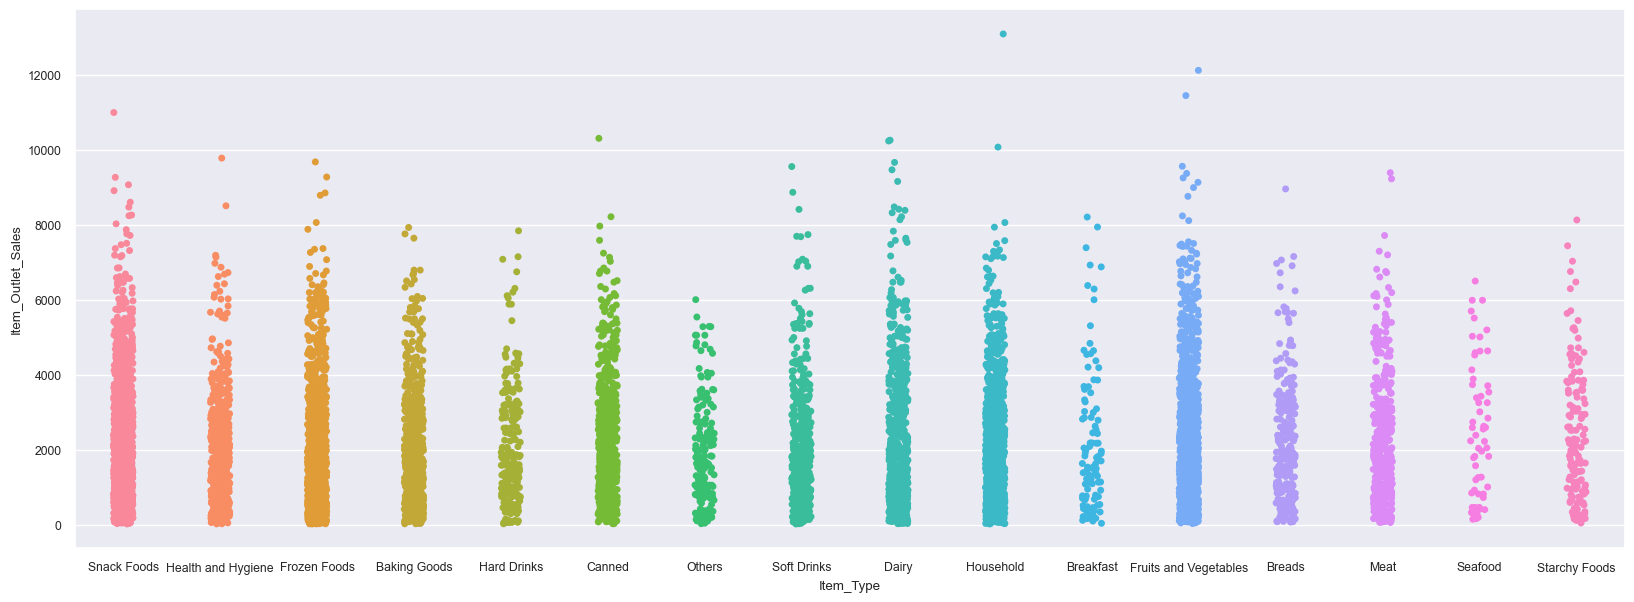

In [636]:
sns.stripplot(data = df , x= 'Item_Type' , y = 'Item_Outlet_Sales' )

<AxesSubplot:xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

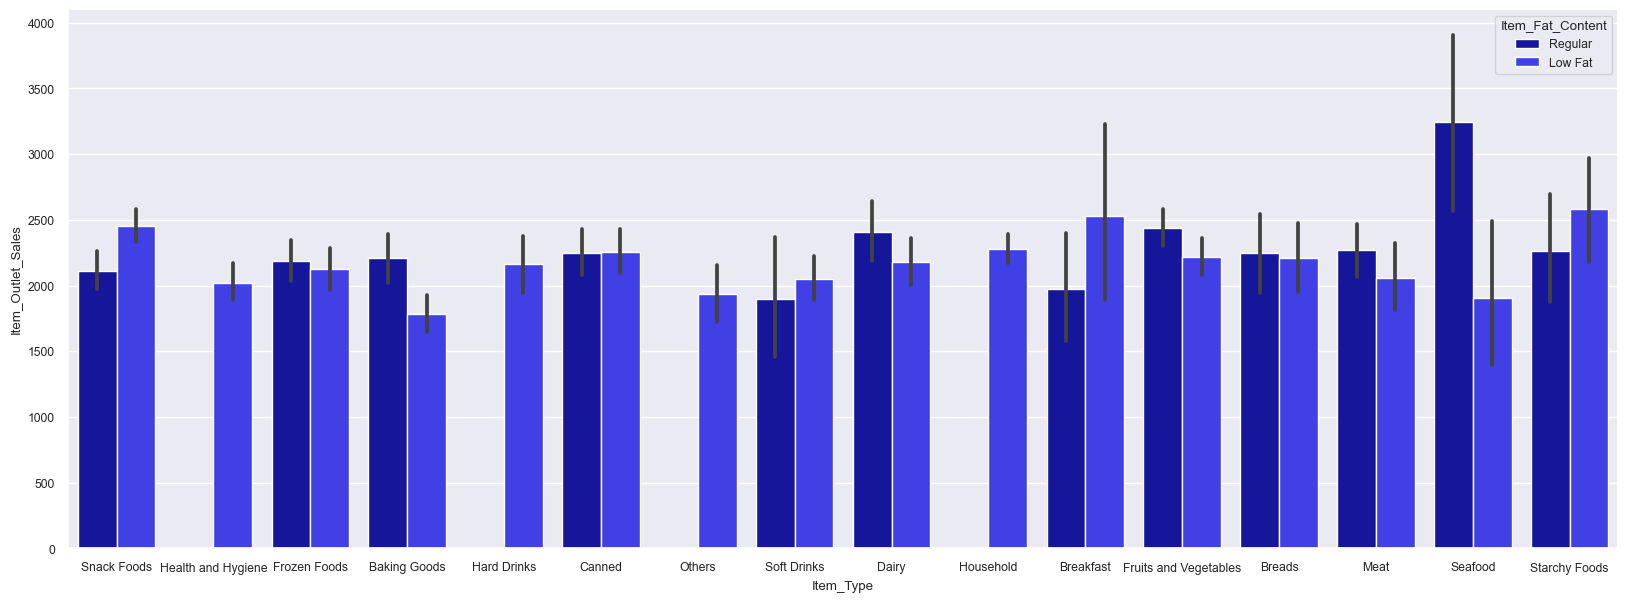

In [637]:
sns.barplot(data = df , x='Item_Type' , y = 'Item_Outlet_Sales' , hue='Item_Fat_Content')

#### Maximum Retail Price = Product's actual Cost+ Profit Margin + CnF margin + Distributor Margin + Retailer Margin + GST + Transportation + other expenses 

In [638]:
df['Item_MRP'].describe() 

count    8389.000000
mean      140.989309
std        62.276883
min        31.290000
25%        93.809400
50%       142.915400
75%       185.660800
max       266.888400
Name: Item_MRP, dtype: float64

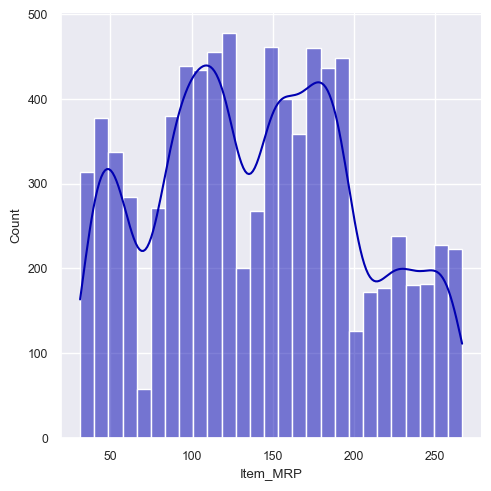

In [639]:
sns.displot(data = df , x='Item_MRP' , kde =True )

<AxesSubplot:xlabel='Item_MRP'>

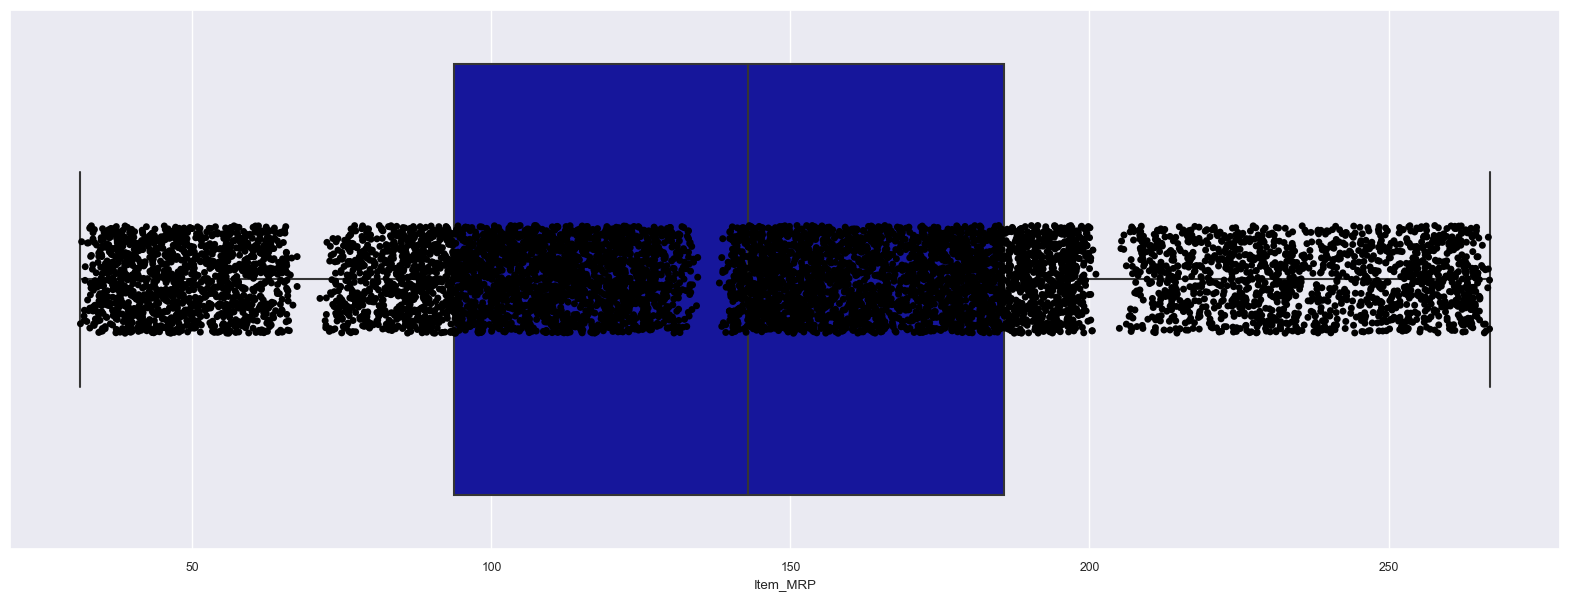

In [640]:
sns.boxplot(data = df , x= 'Item_MRP')
sns.stripplot(data = df , x= 'Item_MRP' , color='Black')

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

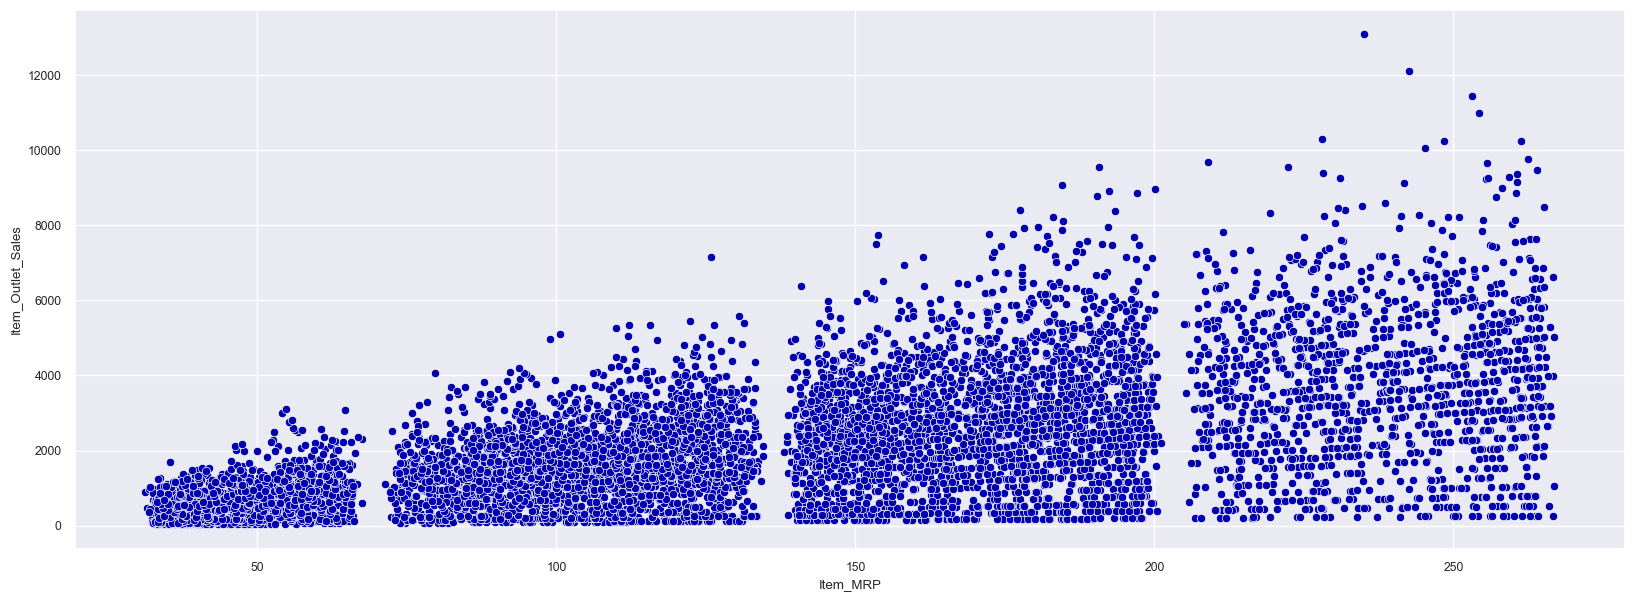

In [641]:
sns.scatterplot(data = df , x= 'Item_MRP' , y = df['Item_Outlet_Sales']) # we have positive corr here 

In [642]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource

source = ColumnDataSource(df)

# the stripplot
p = figure(title="Item_MRP", x_axis_label='Item_MRP', y_axis_label='Item_Outlet_Sales')
p.segment(x0='Item_MRP', y0='Item_Outlet_Sales', x1='Item_MRP', y1=0, source=source, color='blue')

# Show the plot
show(p)


In [643]:
df['Outlet_Establishment_Year'].value_counts()

1985    1391
1987     932
1997     930
1999     930
2004     930
2002     929
2009     928
2007     926
1998     493
Name: Outlet_Establishment_Year, dtype: int64

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

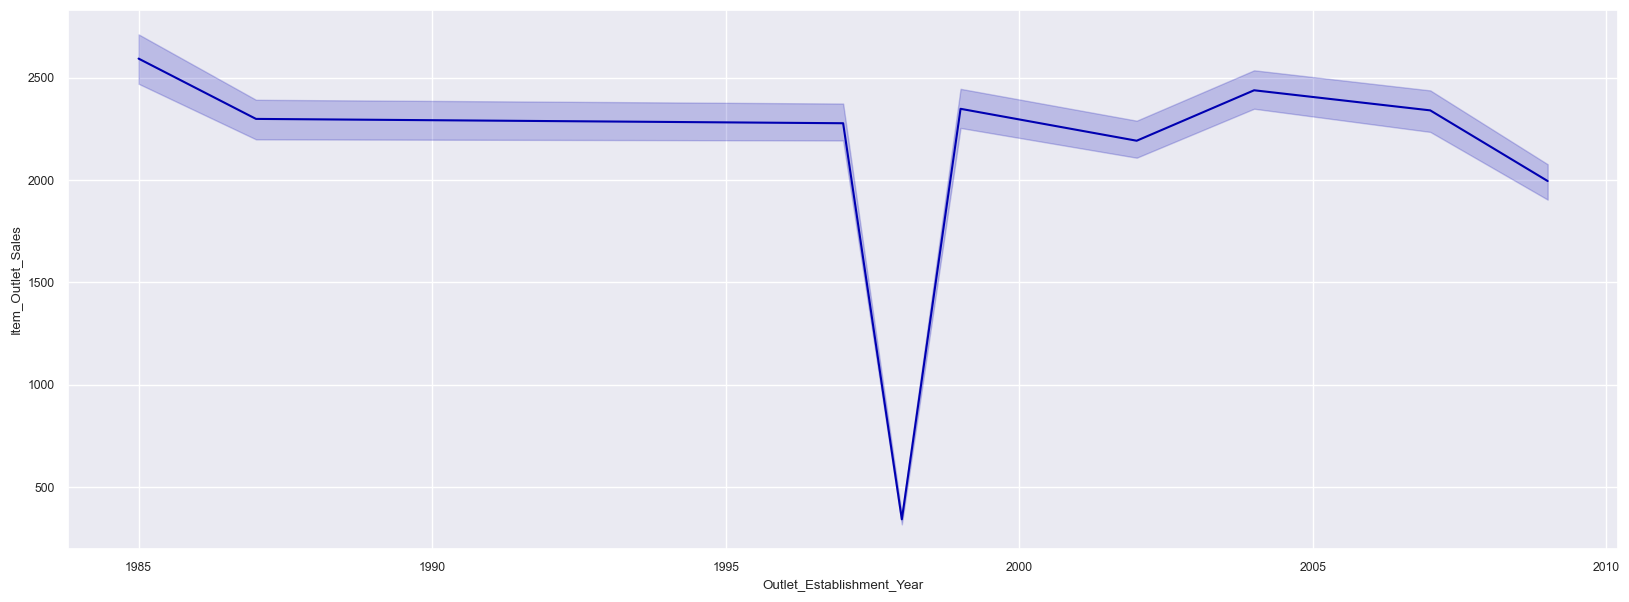

In [644]:
sns.lineplot(data = df , x ='Outlet_Establishment_Year' , y = df['Item_Outlet_Sales'])

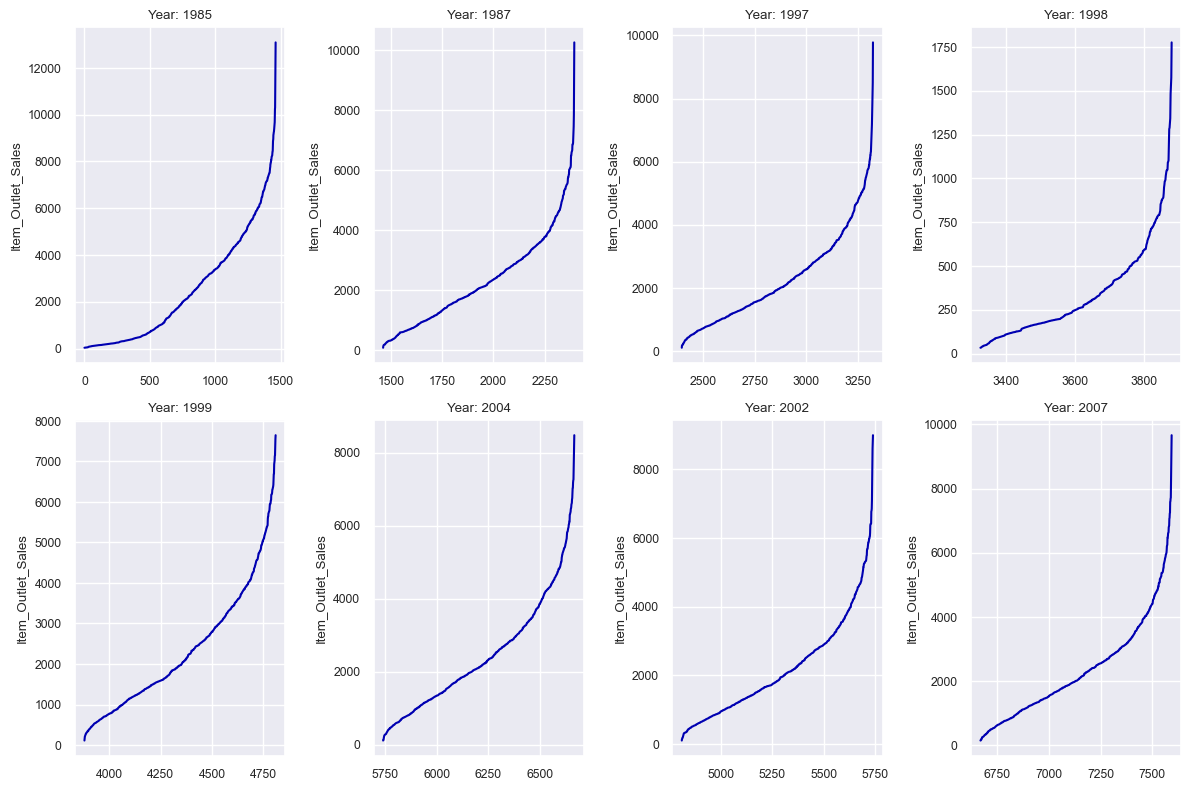

In [645]:
import seaborn as sns
import matplotlib.pyplot as plt

years = [1985,1987,1997,1998,1999,2004,2002,2007]

fig, ax = plt.subplots(2, 4, figsize=(12, 8))
ax = ax.ravel()

for i, year in enumerate(years):
    year_data = df[df['Outlet_Establishment_Year']==year]
    sns.lineplot(x=year_data.index, y='Item_Outlet_Sales', data=year_data, ax=ax[i])
    ax[i].set_title("Year: {}".format(year))

plt.tight_layout()
plt.show()

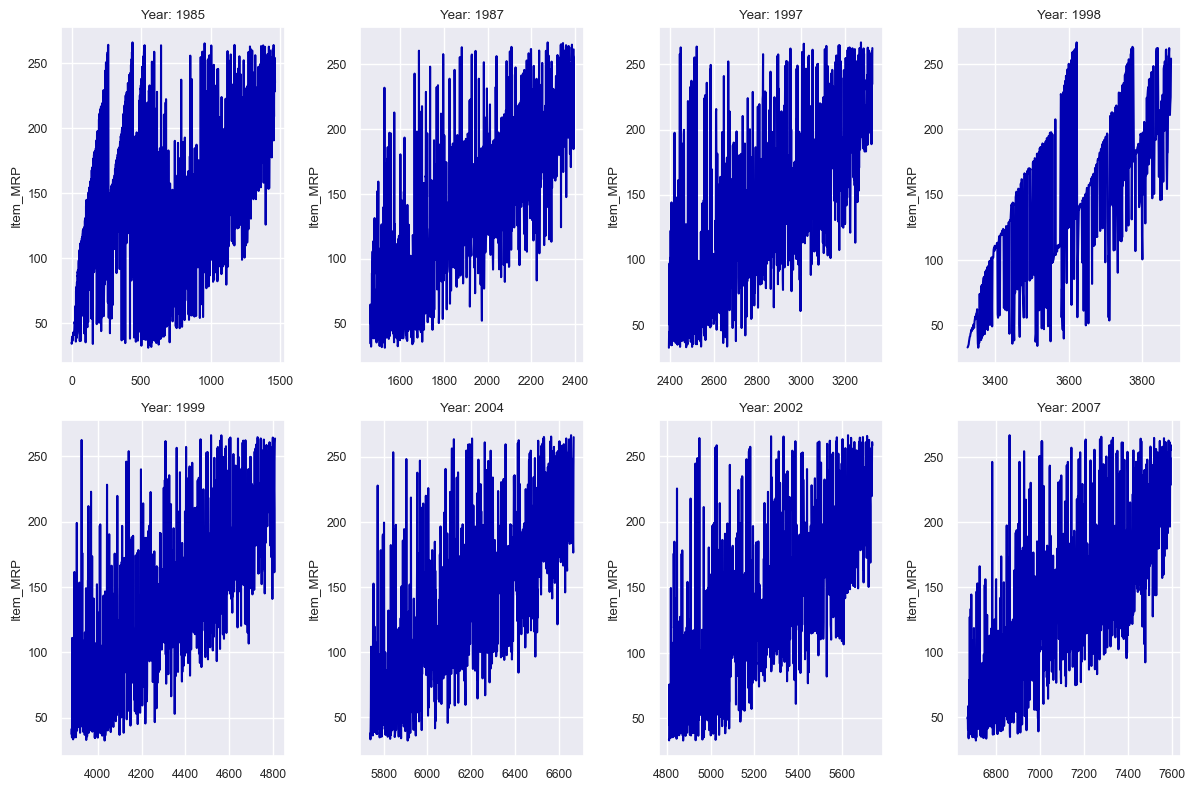

In [646]:
import seaborn as sns
import matplotlib.pyplot as plt

years = [1985,1987,1997,1998,1999,2004,2002,2007]

fig, ax = plt.subplots(2, 4, figsize=(12, 8))
ax = ax.ravel()

for i, year in enumerate(years):
    year_data = df[df['Outlet_Establishment_Year']==year]
    sns.lineplot(x=year_data.index, y='Item_MRP', data=year_data, ax=ax[i])
    ax[i].set_title("Year: {}".format(year))

plt.tight_layout()
plt.show()

<AxesSubplot:>

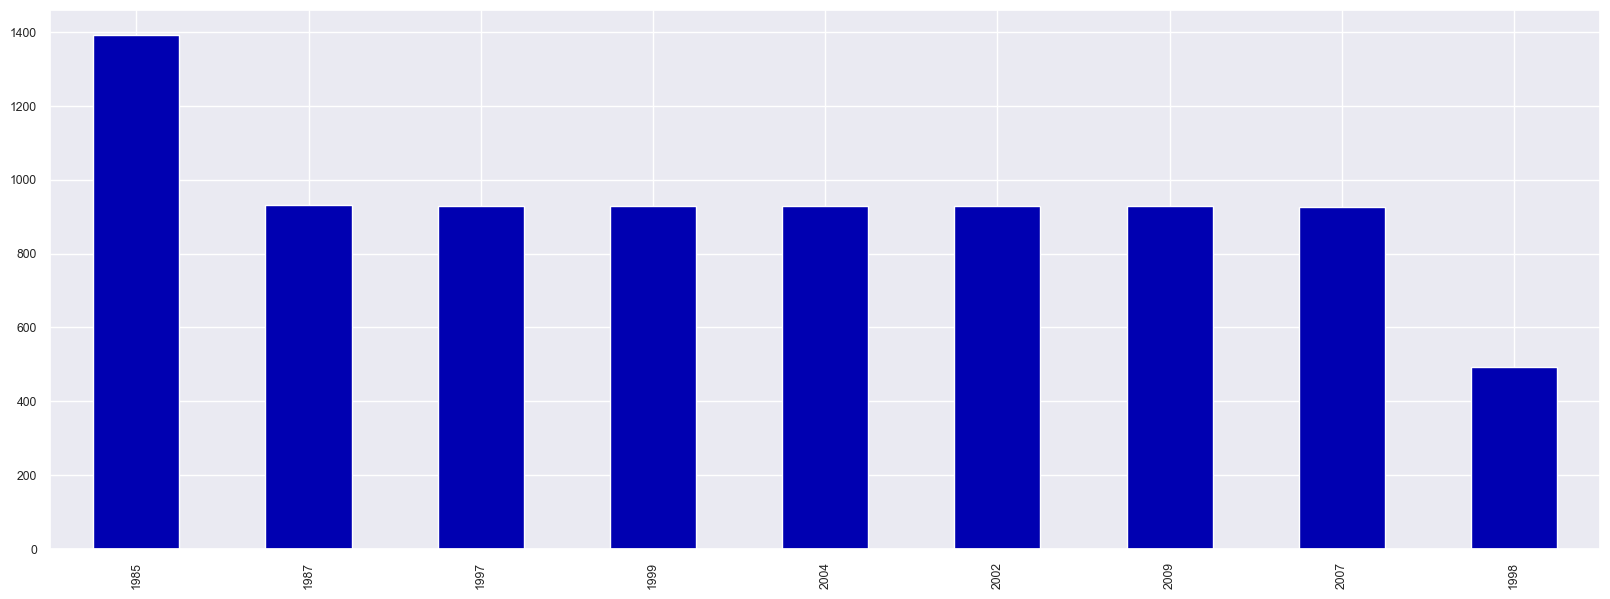

In [647]:
df['Outlet_Establishment_Year'].value_counts().plot.bar()

In [648]:
df.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].sum().sort_values(ascending =False).to_frame()

Item_Outlet_Sales
Outlet_Establishment_Year                   
1985                            3.607724e+06
2004                            2.268123e+06
1999                            2.183970e+06
2007                            2.167465e+06
1987                            2.142664e+06
1997                            2.118395e+06
2002                            2.036725e+06
2009                            1.851823e+06
1998                            1.690786e+05

In [649]:
df['Outlet_Establishment_Year'].isnull().sum()

0

In [650]:
df.Outlet_Size.value_counts()

Medium    2793
Small     2316
High       932
Name: Outlet_Size, dtype: int64

<AxesSubplot:>

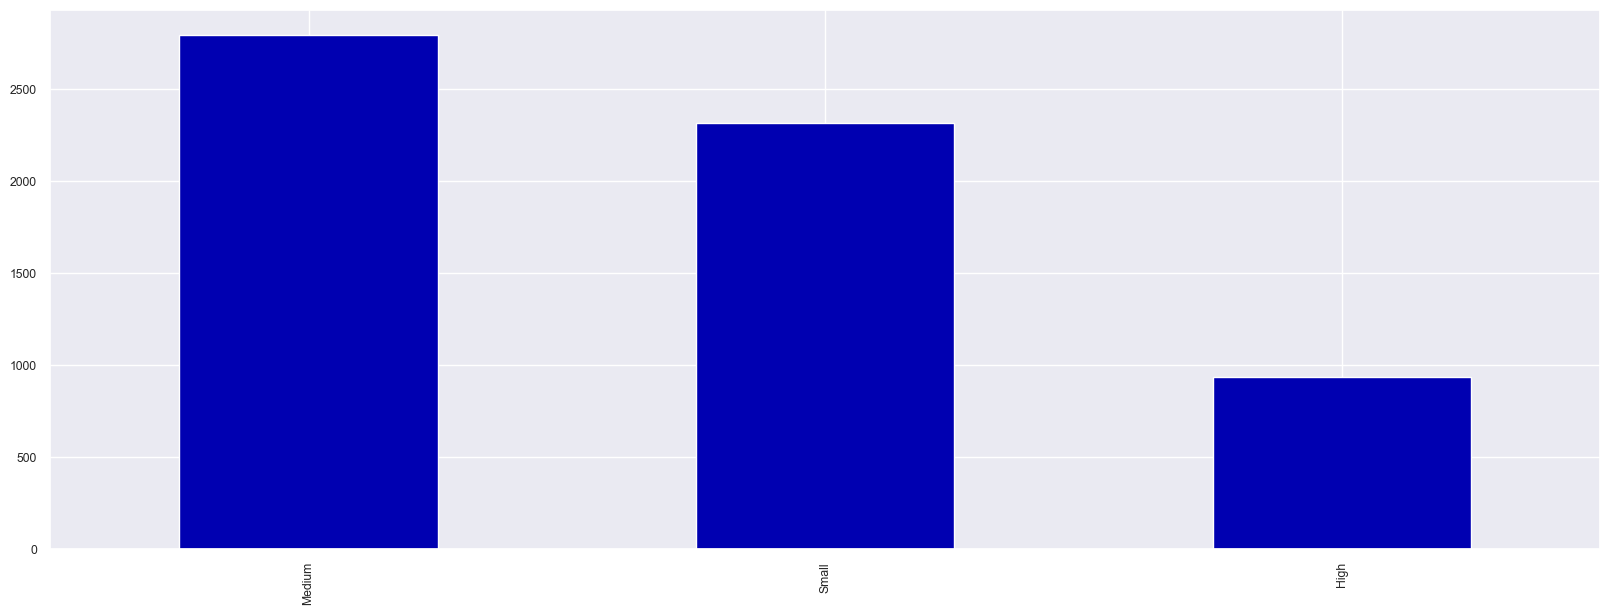

In [651]:
df.Outlet_Size.value_counts().plot.bar()

In [652]:
x  =df.groupby(['Outlet_Establishment_Year' , 'Outlet_Size'])['Item_Outlet_Sales'].sum().to_frame()

x.reset_index(inplace=True)

In [653]:
x

Outlet_Establishment_Year Outlet_Size  Item_Outlet_Sales
0                       1985      Medium       3.453926e+06
1                       1985       Small       1.537978e+05
2                       1987        High       2.142664e+06
3                       1997       Small       2.118395e+06
4                       1999      Medium       2.183970e+06
5                       2004       Small       2.268123e+06
6                       2009      Medium       1.851823e+06

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

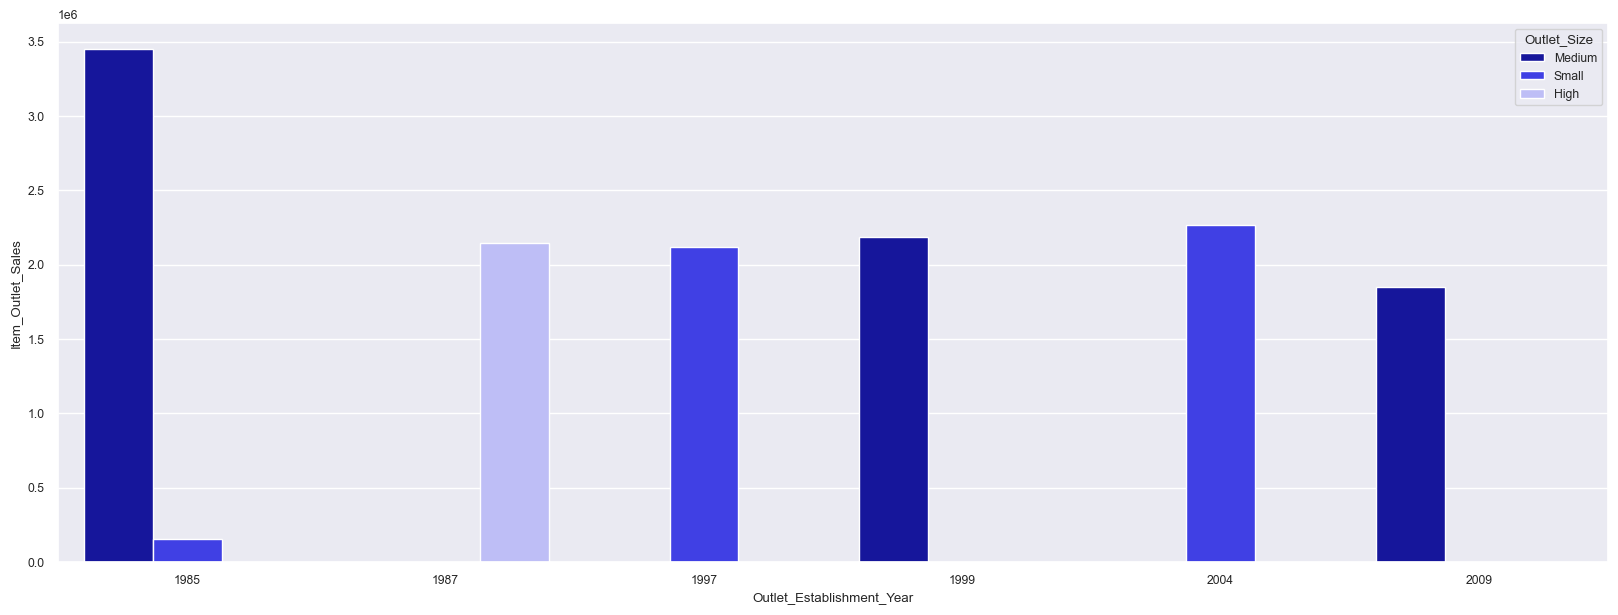

In [654]:
sns.barplot(data = x , x ='Outlet_Establishment_Year' , y ='Item_Outlet_Sales' , hue =  'Outlet_Size' )

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

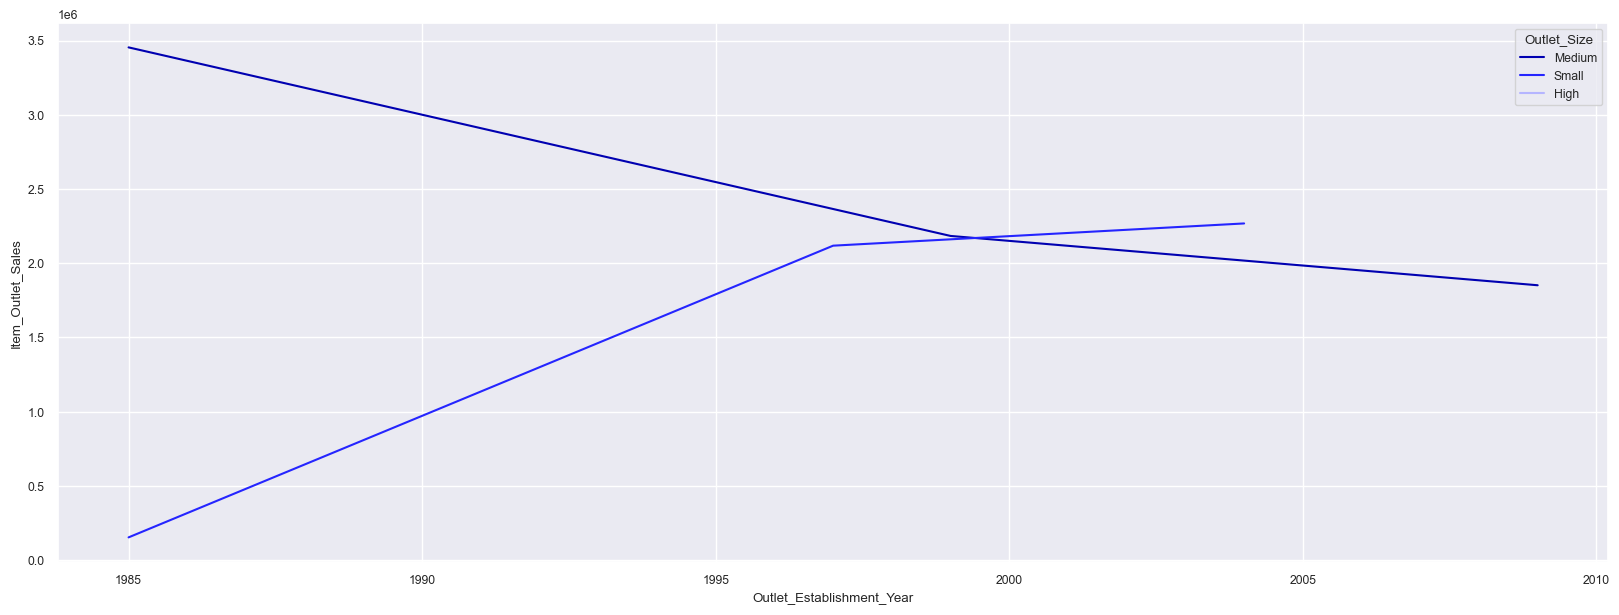

In [655]:
sns.lineplot(data = x , x ='Outlet_Establishment_Year' , y ='Item_Outlet_Sales' , hue ='Outlet_Size' )
### we have nulls in Outlet_Size

In [656]:
df['Outlet_Size'].isnull().sum()

2348

In [657]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3288
Tier 2    2785
Tier 1    2316
Name: Outlet_Location_Type, dtype: int64

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

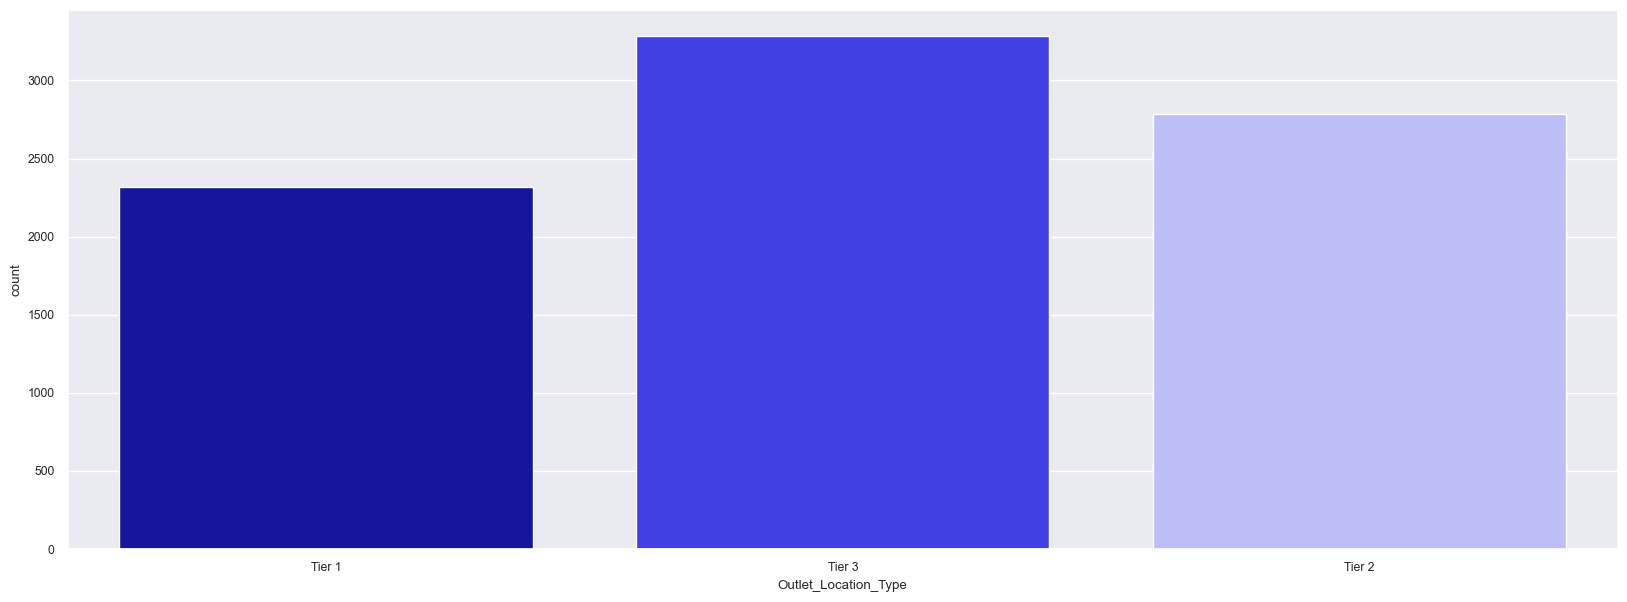

In [658]:
sns.countplot(data = df , x = 'Outlet_Location_Type')

In [659]:
x =df.groupby(['Outlet_Location_Type' , 
               'Outlet_Type','Outlet_Establishment_Year'])['Item_Outlet_Sales'].sum().to_frame().reset_index()
x

Outlet_Location_Type        Outlet_Type  Outlet_Establishment_Year  \
0               Tier 1      Grocery Store                       1985   
1               Tier 1  Supermarket Type1                       1997   
2               Tier 1  Supermarket Type1                       1999   
3               Tier 2  Supermarket Type1                       2002   
4               Tier 2  Supermarket Type1                       2004   
5               Tier 2  Supermarket Type1                       2007   
6               Tier 3      Grocery Store                       1998   
7               Tier 3  Supermarket Type1                       1987   
8               Tier 3  Supermarket Type2                       2009   
9               Tier 3  Supermarket Type3                       1985   

   Item_Outlet_Sales  
0       1.537978e+05  
1       2.118395e+06  
2       2.183970e+06  
3       2.036725e+06  
4       2.268123e+06  
5       2.167465e+06  
6       1.690786e+05  
7       2.142664e+06  
8       1.851823e+06  
9       3.453926e+06

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

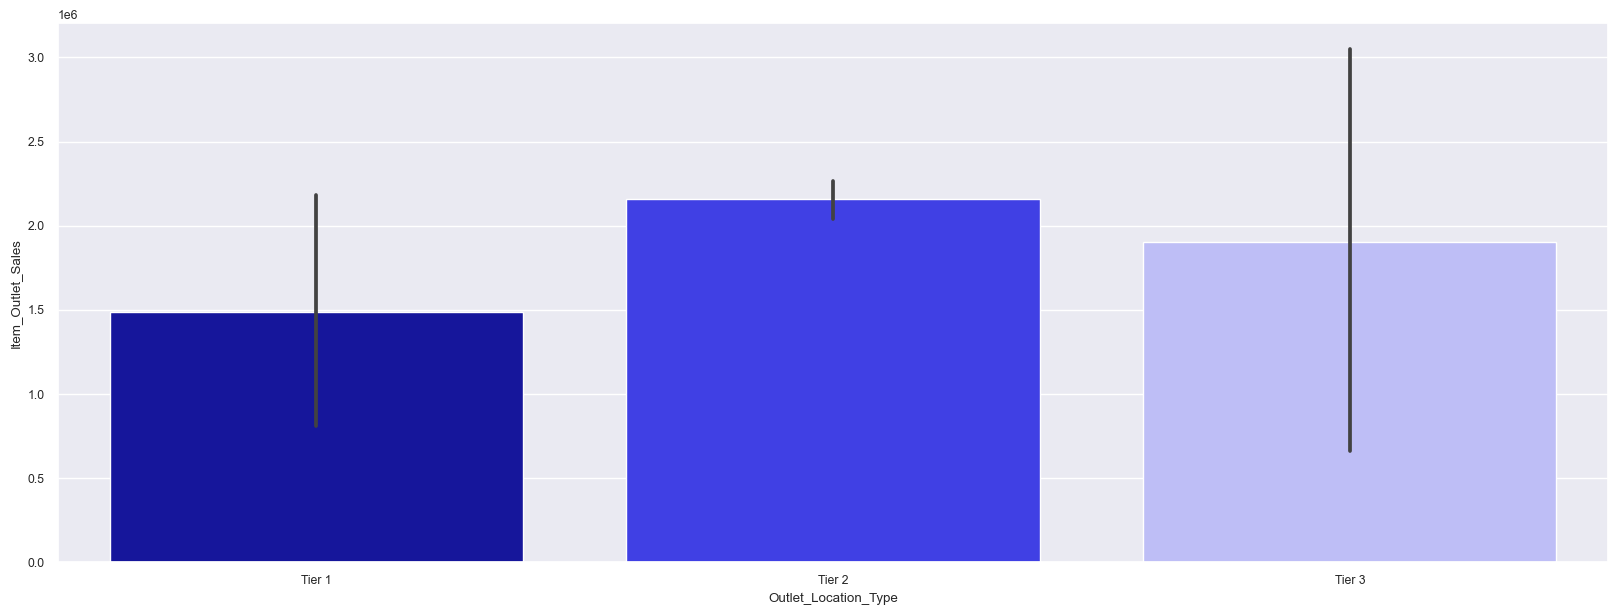

In [660]:
sns.barplot(data = x , x='Outlet_Location_Type' , y = 'Item_Outlet_Sales')

In [661]:
df['Outlet_Location_Type'].isnull().sum()

0

In [662]:
df['Outlet_Type'].unique()

array(['Grocery Store', 'Supermarket Type3', 'Supermarket Type1',
       'Supermarket Type2'], dtype=object)

In [663]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store         949
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

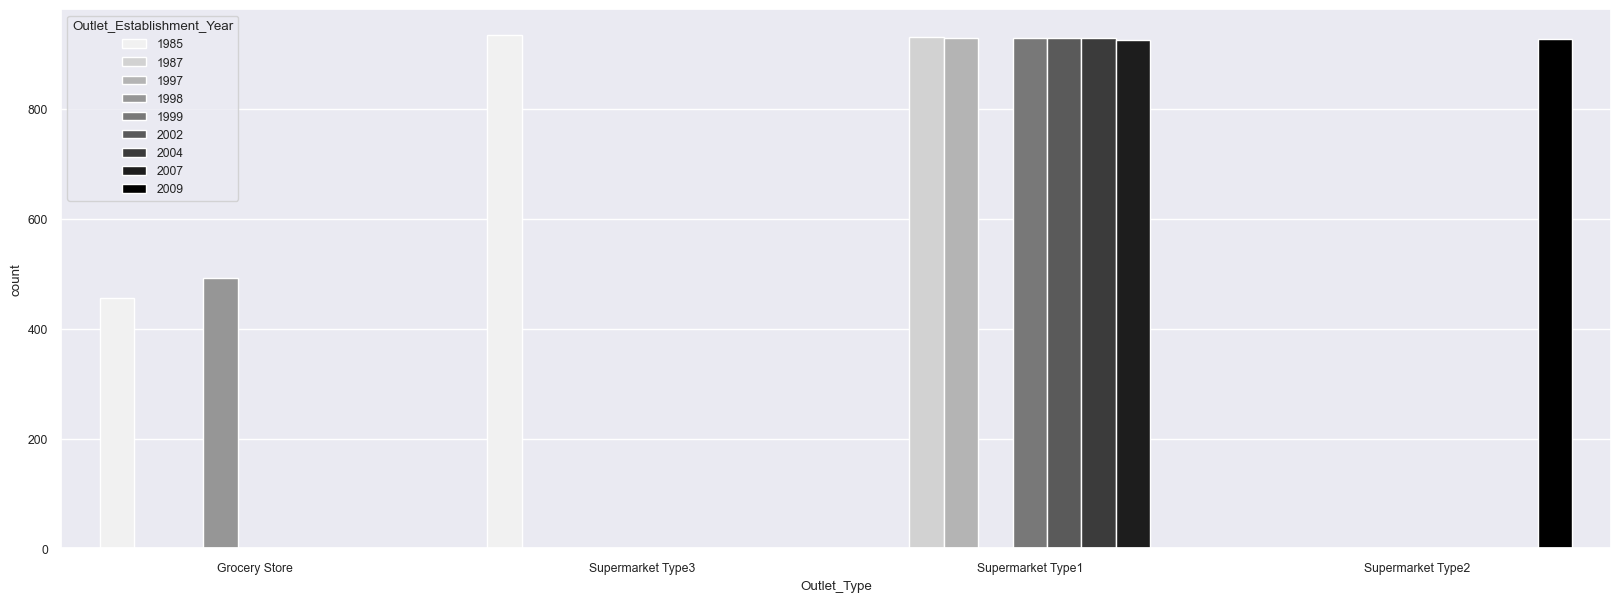

In [664]:
sns.countplot(data = df , x= 'Outlet_Type' , hue='Outlet_Establishment_Year' , color='Black')

In [665]:
### Bivariate Analysis

In [666]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [667]:
#response variable
y = df['Item_Outlet_Sales']

#explanatory variable
x = df[['Item_MRP']]

#constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     4171.
Date:                Tue, 07 Feb 2023   Prob (F-statistic):               0.00
Time:                        19:57:21   Log-Likelihood:                -72629.
No. Observations:                8389   AIC:                         1.453e+05
Df Residuals:                    8387   BIC:                         1.453e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.1190     37.626     -0.322      0.7

#### check corrlation between every feature and taregt to get insights 

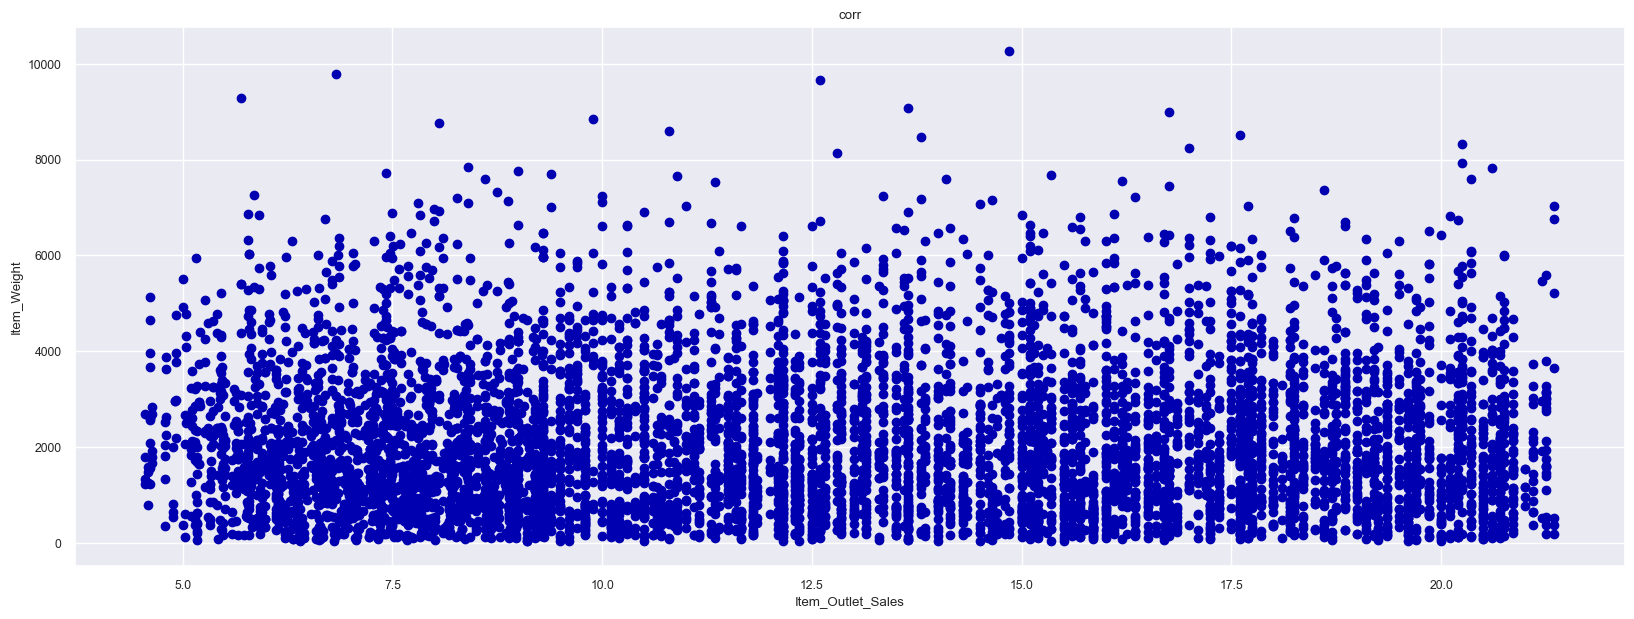

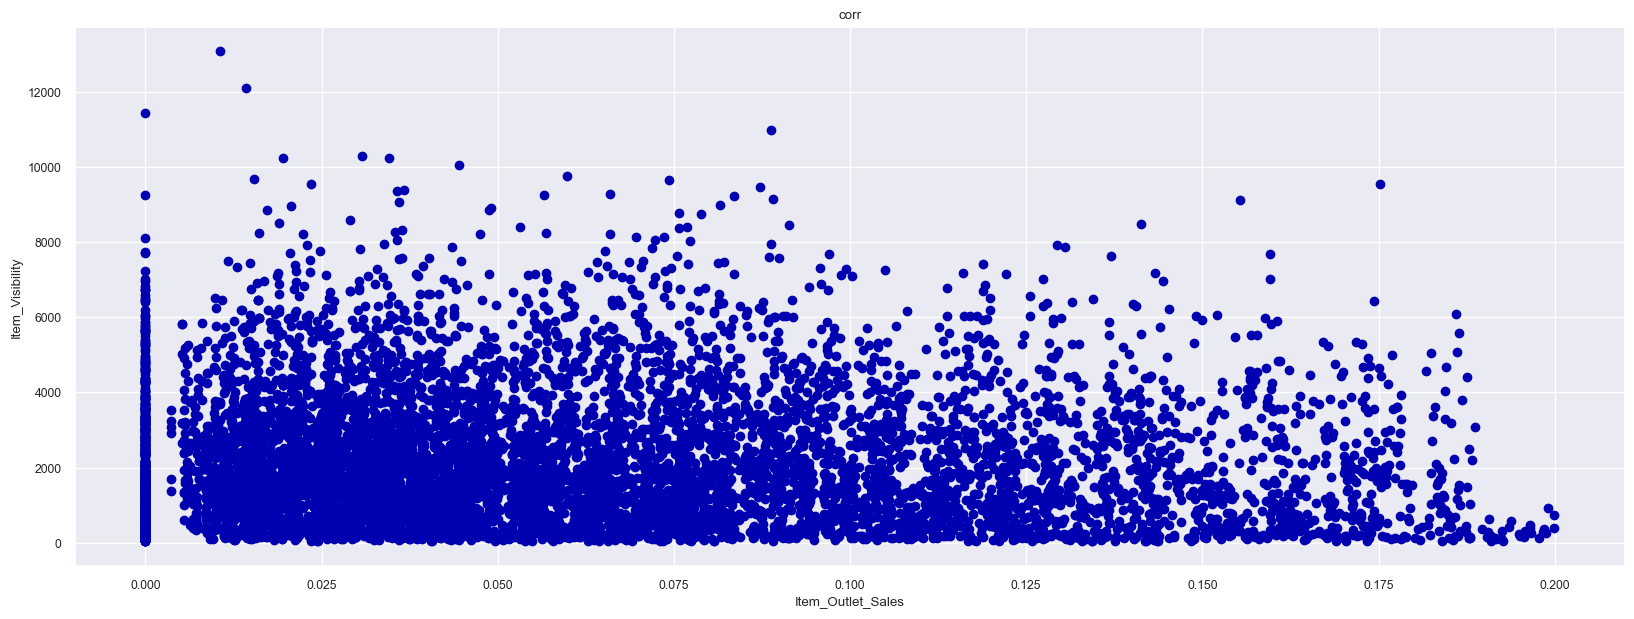

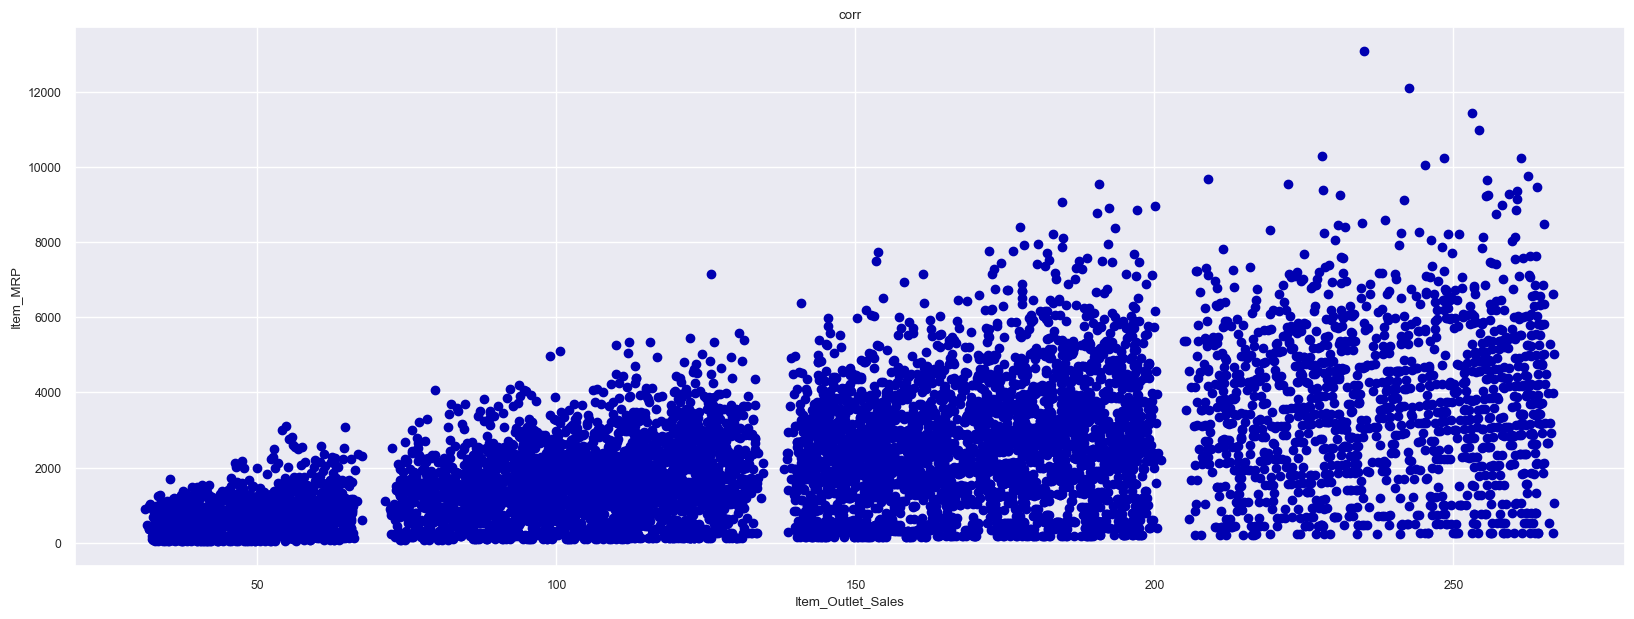

In [668]:
for col in df_num.columns[0:3]:
    plt.scatter(df[col],df['Item_Outlet_Sales'])
    plt.title('corr')
    plt.xlabel('Item_Outlet_Sales')
    plt.ylabel(col)
    plt.show()
# in Item_wieght we don't have a corr 
# in Item_Visibility we have a small corr 
# in Item_MRP we have a positive corr

### bivariant in categorical variable 

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

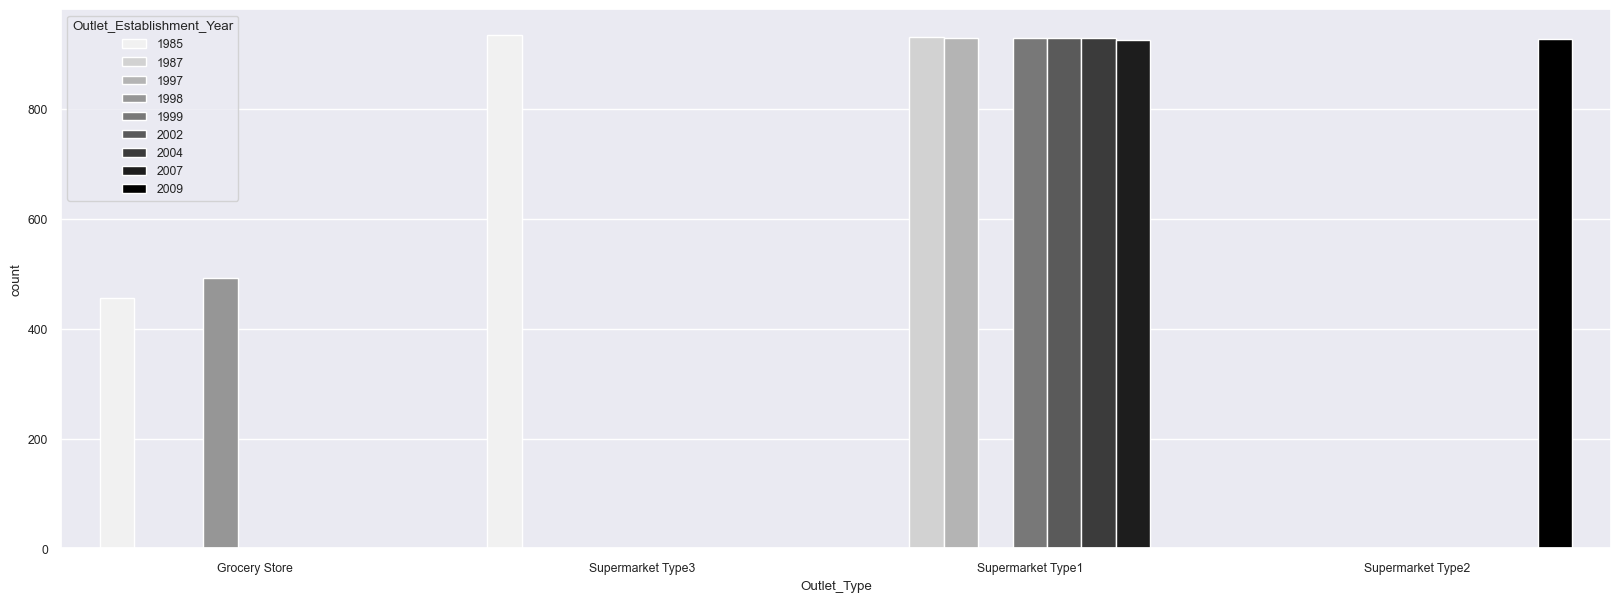

In [669]:
sns.countplot(data = df , x= 'Outlet_Type' , hue='Outlet_Establishment_Year', color='Black')
#spermarket Type 1: You have sales data for all years.
#Supermarket Type 2: You have sales data for 2009 only. this is fuature if sales 
#Supermarket Type 3: You have sales data for 1985 only and currently, it is no longer available.
#Grocery Store : you have sales in in 1985 , 1999 and no longer avaliable  

In [670]:
x = df.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].sum().sort_values(ascending= False).to_frame().reset_index()
x
#Tire 3 : high sales 

Outlet_Location_Type  Item_Outlet_Sales
0               Tier 3       7.617491e+06
1               Tier 2       6.472314e+06
2               Tier 1       4.456163e+06

In [671]:
x  =df.groupby(['Outlet_Establishment_Year' , 'Outlet_Size'])['Item_Outlet_Sales'].sum().to_frame()

x.reset_index(inplace=True)
x
# medium is best sller in all data 

Outlet_Establishment_Year Outlet_Size  Item_Outlet_Sales
0                       1985      Medium       3.453926e+06
1                       1985       Small       1.537978e+05
2                       1987        High       2.142664e+06
3                       1997       Small       2.118395e+06
4                       1999      Medium       2.183970e+06
5                       2004       Small       2.268123e+06
6                       2009      Medium       1.851823e+06

### Missing Value Treatment

In [672]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1391
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2348
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### K-NN imputation 
* is a method of imputing missing values in a dataset by using the average of the values from the k-nearest neighbors. The nearest neighbors are determined based on the similarity of the features that are not missing in both samples. This method is simple and effective when the missing values are randomly distributed and the size of the missing data is relatively small. However, it can lead to biased results when the missing values have a specific pattern and when the number of missing values is significant.

In [673]:
from sklearn.impute import KNNImputer
imputer =KNNImputer(n_neighbors=5)
df['Item_Weight'] = imputer.fit_transform(df[['Item_Weight']])
df1['Item_Weight'] = imputer.fit_transform(df1[['Item_Weight']])

### The ffill method
* (also known as forward fill) is a function used to fill missing values in a dataset. It works by propagating the last non-null value forward. So for each missing value in the dataset, the previous non-null value is used to fill it. This method can be useful in cases where the missing values are in consecutive rows, and it is reasonable to assume that the value at a given position is the same as the value at the previous position.

In [674]:
df['Outlet_Size'] =df['Outlet_Size'].fillna(method='ffill')
df1['Outlet_Size'] =df1['Outlet_Size'].fillna(method='ffill')

In [675]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### Feature Engineering

In [676]:
df['Outlet_Location_Type1']= df['Outlet_Location_Type'].apply(lambda x :x.split(' ')[1])
df1['Outlet_Location_Type1']= df1['Outlet_Location_Type'].apply(lambda x :x.split(' ')[1])


In [677]:
df['Outlet_Location_Type1'] = df['Outlet_Location_Type1'].astype(int)
df1['Outlet_Location_Type1'] = df1['Outlet_Location_Type1'].astype(int)

In [678]:
df.drop('Outlet_Location_Type' , axis =1 , inplace=True)
df1.drop('Outlet_Location_Type' , axis =1 , inplace=True)

In [679]:
df.drop(['Item_Identifier' , 'Outlet_Identifier'] , axis =1 , inplace =True)
df1.drop(['Item_Identifier' , 'Outlet_Identifier'] , axis =1 , inplace =True)

#### we don't have a lot  Feature Engineering in this data 

### Encoding Categorical Variables
* 1- Item_Fat_Content , Outlet_Size , Outlet_Type  is ordinal and must encode by mapping or label encodeing 
* 2-  Item_Type is nominla we must take a one-hot-encoding or binary but in this case we will take one hot 

# 1 -

In [680]:
df['Item_Fat_Content'].unique()

array(['Regular', 'Low Fat'], dtype=object)

In [681]:
mapping = {'Regular':1 , 'Low Fat' :0}
df['Item_Fat_Content']=df['Item_Fat_Content'].map(mapping)
df1['Item_Fat_Content']=df1['Item_Fat_Content'].map(mapping)

In [682]:
df['Item_Fat_Content']

0       1
1       0
2       0
3       1
4       1
       ..
8518    1
8519    0
8520    0
8521    1
8522    0
Name: Item_Fat_Content, Length: 8389, dtype: int64

In [683]:
df['Outlet_Size'].unique()

array(['Small', 'Medium', 'High'], dtype=object)

In [684]:
mapping_Outlet_Size = {'Small':0 , 'Medium':1 , 'High': 2}
df['Outlet_Size']=df['Outlet_Size'].map(mapping_Outlet_Size)
df1['Outlet_Size']=df1['Outlet_Size'].map(mapping_Outlet_Size)

In [685]:
df['Outlet_Size']

0       0
1       0
2       0
3       0
4       0
       ..
8518    1
8519    1
8520    1
8521    1
8522    1
Name: Outlet_Size, Length: 8389, dtype: int64

In [686]:
df['Outlet_Type'].unique()

array(['Grocery Store', 'Supermarket Type3', 'Supermarket Type1',
       'Supermarket Type2'], dtype=object)

In [687]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Outlet_Type']=encoder.fit_transform(df['Outlet_Type'])
df1['Outlet_Type']=encoder.fit_transform(df1['Outlet_Type'])

In [688]:
df['Outlet_Type']

0       0
1       0
2       0
3       0
4       0
       ..
8518    2
8519    2
8520    2
8521    2
8522    2
Name: Outlet_Type, Length: 8389, dtype: int32

In [689]:
df['Outlet_Establishment_Year']=encoder.fit_transform(df['Outlet_Establishment_Year'])
df1['Outlet_Establishment_Year']=encoder.fit_transform(df1['Outlet_Establishment_Year'])

In [690]:
df['Outlet_Establishment_Year']

0       0
1       0
2       0
3       0
4       0
       ..
8518    8
8519    8
8520    8
8521    8
8522    8
Name: Outlet_Establishment_Year, Length: 8389, dtype: int64

# 2-

In [691]:
df['Item_Type'].unique()

array(['Snack Foods', 'Health and Hygiene', 'Frozen Foods',
       'Baking Goods', 'Hard Drinks', 'Canned', 'Others', 'Soft Drinks',
       'Dairy', 'Household', 'Breakfast', 'Fruits and Vegetables',
       'Breads', 'Meat', 'Seafood', 'Starchy Foods'], dtype=object)

# PreProcessing Data

In [692]:
from category_encoders import BinaryEncoder

encoder = BinaryEncoder(cols=['Item_Type'])

# Fit and transform the data
df_encoded = encoder.fit_transform(df[['Item_Type']])
df_encoded = encoder.fit_transform(df1[['Item_Type']])
print(pd.DataFrame((df_encoded)))

      Item_Type_0  Item_Type_1  Item_Type_2  Item_Type_3  Item_Type_4
0               0            0            0            0            1
1               0            0            0            1            0
2               0            0            0            1            1
3               0            0            0            0            1
4               0            0            0            1            0
...           ...          ...          ...          ...          ...
5676            0            0            0            0            1
5677            0            1            1            1            1
5678            0            0            1            1            0
5679            0            1            1            1            0
5680            0            1            1            1            0

[5681 rows x 5 columns]


### in machine learning model we don't need item type 

In [693]:
df.drop(['Outlet_Type' ,'Item_Type'] , axis =1 , inplace=True)

In [694]:
df1.drop(columns=['Item_Type' , 'Outlet_Type'] , inplace=True)

### Split the data to train and test

In [695]:
from sklearn.model_selection import train_test_split , RandomizedSearchCV

In [696]:
x = df.drop(['Item_Outlet_Sales'] , axis =1)
y=df['Item_Outlet_Sales']

In [697]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
fs = SelectKBest(score_func=f_classif, k=7) #selectiong best features corrleted 
X_selected = fs.fit_transform(x , y)
cols = fs.get_support(indices=True) #get names of the features by get_support 
features_df_new = x.iloc[:,cols]

In [698]:
features_df_new

Item_Weight  Item_Fat_Content  Item_Visibility  Item_MRP  \
0       12.868258                 1         0.134328   35.0558   
1       12.868258                 0         0.073077   34.3216   
2       12.868258                 0         0.024546   34.6190   
3       12.868258                 1         0.000000   38.1848   
4       12.868258                 1         0.192650   37.4506   
...           ...               ...              ...       ...   
8518    17.000000                 1         0.140090  265.1884   
8519    16.700000                 0         0.026729  248.4776   
8520    12.500000                 0         0.081465  220.7798   
8521    20.200000                 1         0.096907  175.5028   
8522    21.350000                 0         0.069103  259.9278   

      Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type1  
0                             0            0                      1  
1                             0            0                      1  
2                             0            0                      1  
3                             0            0                      1  
4                             0            0                      1  
...                         ...          ...                    ...  
8518                          8            1                      3  
8519                          8            1                      3  
8520                          8            1                      3  
8521                          8            1                      3  
8522                          8            1                      3  

[8389 rows x 7 columns]

In [699]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

In [700]:
y_val

5037    1062.6168
1333    6064.1064
4079    1054.6272
2555     892.1720
2769    1596.5884
          ...    
1201    4753.8120
7450    3823.0236
3026    2745.0934
3554     197.0768
3214    4175.8976
Name: Item_Outlet_Sales, Length: 1678, dtype: float64

In [701]:
from sklearn.preprocessing import RobustScaler , StandardScaler , MinMaxScaler
scaler = RobustScaler()
col_to_scalled = ['Item_Weight','Item_MRP','Item_Visibility']
x_train[col_to_scalled] = scaler.fit_transform(x_train[col_to_scalled])
x_val[col_to_scalled] = scaler.fit_transform(x_val[col_to_scalled])

In [702]:
x_train

Item_Weight  Item_Fat_Content  Item_Visibility  Item_MRP  \
736      0.000000                 1         1.494957 -0.648610   
7494    -1.105710                 1         0.843036  0.013070   
7195    -1.148247                 1        -0.348409 -0.407527   
236      0.000000                 1         0.401527 -0.286427   
5455     0.765932                 0         1.103347 -0.243605   
...           ...               ...              ...       ...   
5868    -0.114665                 1         0.132769 -0.937960   
5325    -0.032576                 0         0.161087  0.178397   
5524    -0.663919                 0         0.278616  0.803158   
932      0.000000                 0        -0.545724  0.414835   
7404     0.967424                 0        -0.546332 -0.238188   

      Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type1  
736                           0            1                      3  
7494                          7            0                      2  
7195                          7            0                      2  
236                           0            0                      1  
5455                          5            1                      2  
...                         ...          ...                    ...  
5868                          6            0                      2  
5325                          5            1                      2  
5524                          5            1                      2  
932                           0            1                      3  
7404                          7            0                      2  

[6711 rows x 7 columns]

In [703]:
x_test[col_to_scalled] = scaler.fit_transform(x_test[col_to_scalled])

In [704]:
x_test

Item_Weight  Item_Fat_Content  Item_Visibility  Item_MRP  \
0        1.210273                 0        -0.701481 -0.366243   
1       -0.660501                 1        -0.236790 -0.590469   
2        0.286156                 0         0.683884  1.095223   
3       -0.808510                 0        -0.583685  0.148651   
4        0.000000                 1         0.970328  1.013098   
...           ...               ...              ...       ...   
1700    -1.020381                 0        -0.128142  0.880102   
1701     0.000000                 0         0.413470 -1.122081   
1702    -0.270569                 0        -0.409008 -0.367708   
1703    -0.777706                 0         0.019349 -0.123517   
1704    -0.945249                 0         1.236856 -0.167524   

      Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type1  
0                             4            1                      1  
1                             7            1                      2  
2                             3            1                      3  
3                             7            1                      2  
4                             0            1                      3  
...                         ...          ...                    ...  
1700                          6            0                      2  
1701                          0            1                      3  
1702                          8            1                      3  
1703                          7            1                      2  
1704                          2            0                      1  

[1705 rows x 7 columns]

In [705]:
from sklearn.linear_model import LinearRegression , Lasso , Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRFRegressor

### models
* Linear Regression
* Regularized Linear Regression (lasso , Ridge)
* RandomForest
* XGBoost

In [706]:
LinearRegression = LinearRegression()
RandomForestRegressor=RandomForestRegressor(n_estimators= 50, min_samples_split=8, min_samples_leaf= 9,max_features=0.4,max_depth=4)
XGBRFRegressor = XGBRFRegressor(n_estimators = 50 ,min_samples_split=12 , min_samples_leaf = 1 , max_features =  0.7000000000000001 , max_depth=6)
Lasso = Lasso()
Ridge = Ridge()

### fit the models

In [707]:
LinearRegression.fit(x_train , y_train)
RandomForestRegressor.fit(x_train , y_train)
XGBRFRegressor.fit(x_train , y_train)
Lasso.fit(x_train , y_train)
Ridge.fit(x_train , y_train)

[19:57:26] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




Ridge()

### Hyper Parameter Tuning XGB

In [708]:
param_grid = {
    'n_estimators': [100, 500, 1000, 2000],
    'max_depth': [3, 5, 7, 9],
    'min_child_weight': [1, 3, 5, 7],
    'learning_rate': [0.01, 0.03, 0.05, 0.07],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5],
    'reg_alpha': [0, 0.1, 0.2, 0.3, 0.4, 0.5],
    'reg_lambda': [0, 0.1, 0.2, 0.3, 0.4, 0.5],
}

# Use RandomizedSearchCV to perform the hyperparameter tuning
random_search = RandomizedSearchCV(XGBRFRegressor, param_distributions=params, n_iter=100, cv=10, n_jobs=-1 , scoring='r2')

# Fit the RandomizedSearchCV model to the data
random_search.fit(x_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters found: ", random_search.best_params_)

[20:02:31] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Best Hyperparameters found:  {'n_estimators': 100, 'min_samples_split': 18, 'min_samples_leaf': 7, 'max_features': 0.30000000000000004, 'max_depth': 6}


### Predict by x_val

In [709]:
LinearRegression_predict =LinearRegression.predict(x_val)
RandomForestRegressor_predict =RandomForestRegressor.predict(x_val)
XGBRFRegressor_predict =random_search.predict(x_val)
Lasso_predict =Lasso.predict(x_val)
Ridge_predict =Ridge.predict(x_val)

### evaluating model preformance

In [721]:
from sklearn.metrics import mean_squared_error , r2_score
print("Test mean_squared_error in LR is: " , mean_squared_error(y_val , LinearRegression_predict , squared=False))
print("Test mean_squared_error in RF is: ",mean_squared_error(y_val,RandomForestRegressor_predict,squared=False))
print("Test mean_squared_error in XGBR is :",mean_squared_error(y_val,XGBRFRegressor_predict,squared=False))
print("Test mean_squared_error in LASSO is: ",mean_squared_error(y_val,Lasso_predict,squared=False))
print("Test mean_squared_error in RiDGE is :",mean_squared_error(y_val,Ridge_predict,squared=False))

Test mean_squared_error in LR is:  1366.4579758708337
Test mean_squared_error in RF is:  1278.111004644148
Test mean_squared_error in XGBR is : 1125.9027263116368
Test mean_squared_error in LASSO is:  1366.5155823373689
Test mean_squared_error in RiDGE is : 1366.4613027376706


In [722]:
print("Test R squared in LR is : ",r2_score(y_val,LinearRegression_predict))
print("Test R squared in RF is : ",r2_score(y_val,RandomForestRegressor_predict))
print("Test R squared in XGBR is : ",r2_score(y_val,XGBRFRegressor_predict))
print("Test R squared in LASSO is : ",r2_score(y_val,Lasso_predict))
print("Test R squared in RIDGE is : ",r2_score(y_val,Ridge_predict))

Test R squared in LR is :  0.37148771290336835
Test R squared in RF is :  0.4501321081878399
Test R squared in XGBR is :  0.5732996942818493
Test R squared in LASSO is :  0.371434718759592
Test R squared in RIDGE is :  0.37148465246643325


### make prediction in test dataframe

In [715]:
array = random_search.predict(x_test)

In [717]:
x_test.assign(predict=array)

Item_Weight  Item_Fat_Content  Item_Visibility  Item_MRP  \
0        1.210273                 0        -0.701481 -0.366243   
1       -0.660501                 1        -0.236790 -0.590469   
2        0.286156                 0         0.683884  1.095223   
3       -0.808510                 0        -0.583685  0.148651   
4        0.000000                 1         0.970328  1.013098   
...           ...               ...              ...       ...   
5676    -0.329922                 1        -0.612171 -0.001092   
5677    -0.765685                 1         1.337584  0.302674   
5678    -0.405054                 0         0.291713 -0.247465   
5679     0.391340                 1        -0.815383  0.799069   
5680    -0.480185                 1         0.761354 -0.672594   

      Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type1  \
0                             4            1                      1   
1                             7            1                      2   
2                             3            1                      3   
3                             7            1                      2   
4                             0            1                      3   
...                         ...          ...                    ...   
5676                          2            0                      1   
5677                          8            1                      3   
5678                          5            1                      2   
5679                          7            1                      2   
5680                          5            1                      2   

          predict  
0     1648.971436  
1     1376.454834  
2     3802.481445  
3     2462.190430  
4     5803.548340  
...           ...  
5676  2074.229736  
5677  2495.458984  
5678  1817.841675  
5679  3182.681641  
5680  1394.964966  

[5681 rows x 8 columns]

In [713]:
import joblib 
joblib.dump(random_search , 'model.h5')

['model.h5']